In [116]:
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair
from dfply import *
from plotnine import *
import seaborn as sns
import missingno
import random

# Stopwords from sklearn
# Stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as esw

#### Stopwords from nltk
import nltk
from nltk.corpus import stopwords
nltk_sw = stopwords.words("english")

#### Stopwrods from spacy
from spacy.lang.en.stop_words import STOP_WORDS as spacy_sw

## Sentiemtn Analysis
import textblob
import vaderSentiment

# Count vectorizer for word frequencies
from sklearn.feature_extraction.text import CountVectorizer

# Lemonizer
from nltk.stem.wordnet import WordNetLemmatizer
# Stemer
from nltk.stem import SnowballStemmer

# Topic modeling
import gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
from gensim import corpora
import pickle # saves the object into a file
# But don't worry Python can understand it
# import spacy
# spacy.load('en_core_web_sm')
# from spacy.lang.en import English
# parser = English()
# import nltk
# nltk.download('wordnet')
# from nltk.corpus import wordnet as wn
from transformers import pipeline

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [2]:
import sys
# !{sys.executable}-m pip install --upgrade ipykernel

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [3]:
# Stopword calculations
en_stop = set(nltk.corpus.stopwords.words('english'))
specialChars = "!@#$%^&*()\'\"?.,~<>_-+{}[]|;"
myPunc = set(specialChars)
en_stop.update(myPunc)
en_stop.add('n\'t')

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [4]:
speeches = pd.read_csv("un_gen_debates_text.csv", encoding = "utf-8")
print(speeches.shape)
print(speeches.columns)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


(7507, 7)
Index(['session', 'year', 'country', 'country_name', 'speaker', 'position',
       'text'],
      dtype='object')


7507 rows, 7 different columns.

In [5]:
speeches.head()

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<AxesSubplot:>

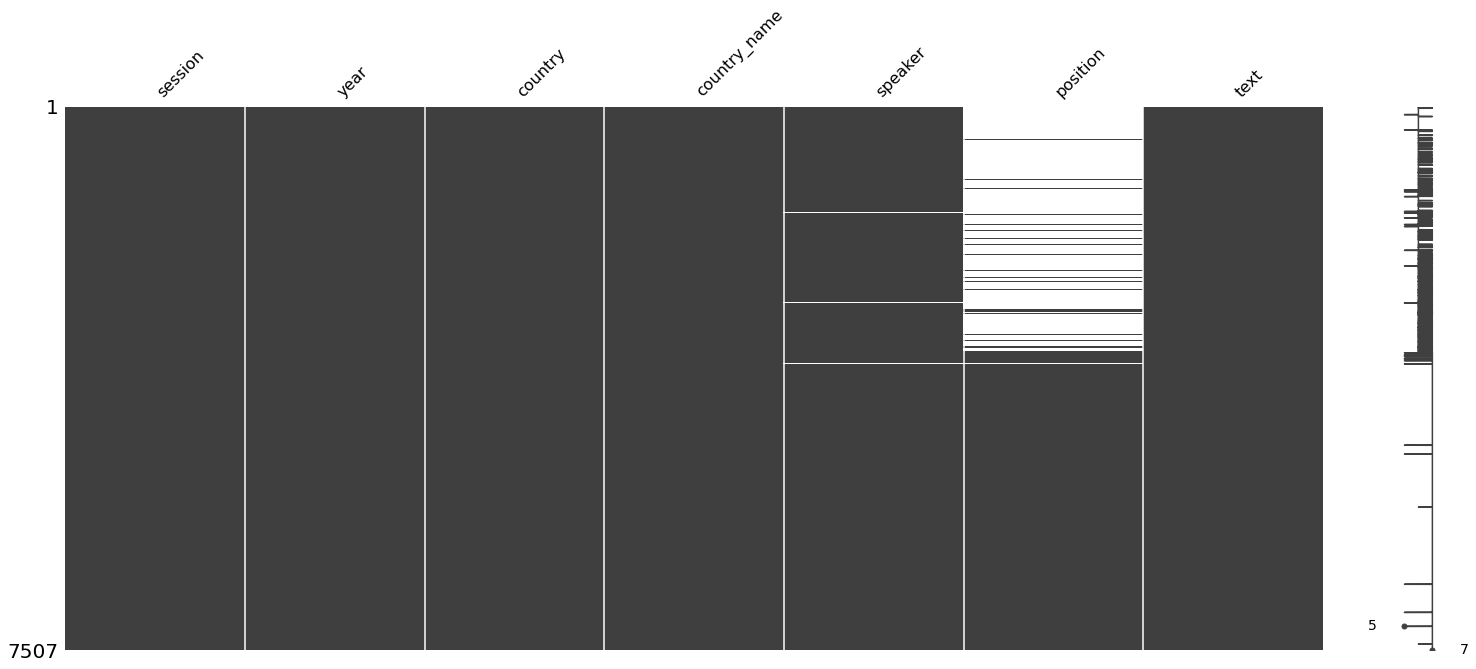

In [6]:
missingno.matrix(speeches)

Position appears to be the column with the biggest amount of missingness.

In [7]:
speeches.isna().sum()

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
dtype: int64

Wow. There are quite a bit of NAs in the `position` column. I wonder why. 

And a little bit in the `speaker` column.

In [8]:
speeches.text[0]

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


"33: May I first convey to our President the congratulations of the Albanian delegation on his election to the Presidency of the twenty-fifth session of the General Assembly?\n34.\tIn taking up the work on the agenda of the twenty- fifth session of the General Assembly, which is being held on the eve of the twenty-fifth anniversary of the coming into force of the Charter of the United Nations, the peace-loving Member States would have wished to be in a position to present on this occasion some picture of positive and satisfactory activity on the part of the United Nations. The Albanian delegation, for its part, would have taken great pleasure in drawing up such a balance sheet of activities covering a quarter of a century, which is certainly no short period in the life of an international organization. Unfortunately, this is not the situation. Created on the day after victory had been achieved over the Powers of the Rome BerlinTokyo Axis and conceived in the spirit of the principles wh

My God these humans talked a FREAKTON! 

I'd rather eat horse scat off a rotting cow than read this mess.

In [9]:
# Creating an nlp object
nlp = spacy.load("en_core_web_sm")
doc = nlp(speeches.text[0])

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


### Printing text, lemma, parts of speech...

In [10]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


33 33 NUM CD ROOT dd False False
: : PUNCT : punct : False False
May may AUX MD aux Xxx True True
I I PRON PRP nsubj X True True
first first ADV RB advmod xxxx True True
convey convey VERB VB ROOT xxxx True False
to to ADP IN prep xx True True
our our PRON PRP$ poss xxx True True
President President PROPN NNP pobj Xxxxx True False
the the DET DT det xxx True True
congratulations congratulation NOUN NNS dobj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
Albanian albanian ADJ JJ amod Xxxxx True False
delegation delegation NOUN NN pobj xxxx True False
on on ADP IN prep xx True True
his his PRON PRP$ poss xxx True True
election election NOUN NN pobj xxxx True False
to to ADP IN prep xx True True
the the DET DT det xxx True True
Presidency Presidency PROPN NNP pobj Xxxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
twenty twenty NUM CD nummod xxxx True True
- - PUNCT HYPH punct - False False
fifth fifth ADJ JJ amod xxxx True Fa

on on ADP IN prep xx True True
the the DET DT det xxx True True
contrary contrary NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
under under ADP IN prep xxxx True True
the the DET DT det xxx True True
diktat diktat NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
imperialist imperialist ADJ JJ amod xxxx True False
powers power NOUN NNS pobj xxxx True False
, , PUNCT , punct , False False
the the DET DT det xxx True True
United United PROPN NNP compound Xxxxx True False
States States PROPN NNP nsubj Xxxxx True False
of of ADP IN prep xx True True
America America PROPN NNP pobj Xxxxx True False
foremost foremost ADV RB advmod xxxx True False
among among ADP IN prep xxxx True True
them they PRON PRP pobj xxxx True True
, , PUNCT , punct , False False
embarked embark VERB VBN ccomp xxxx True False
on on ADP IN prep xx True True
a a DET DT det x True True
path path NOUN NN pobj xxxx True False
diametrically diametrically ADV RB advmo

vital vital ADJ JJ amod xxxx True False
interests interest NOUN NNS dobj xxxx True False
and and CCONJ CC cc xxx True True
to to PART TO aux xx True True
sustain sustain VERB VB conj xxxx True False
their their PRON PRP$ poss xxxx True True
legitimate legitimate ADJ JJ amod xxxx True False
struggle struggle NOUN NN dobj xxxx True False
for for ADP IN prep xxx True True
liberation liberation NOUN NN pobj xxxx True False
from from ADP IN prep xxxx True True
the the DET DT det xxx True True
imperialist imperialist ADJ JJ amod xxxx True False
, , PUNCT , punct , False False
colonialist colonialist ADJ JJ conj xxxx True False
and and CCONJ CC cc xxx True True
racist racist ADJ JJ conj xxxx True False
yoke yoke NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
But but CCONJ CC cc Xxx True True
following follow VERB VBG prep xxxx True False
the the DET DT det xxx True True
usurpation usurpation NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
power power NOUN NN pobj xxx

imperialist imperialist NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
colonialist colonialist ADJ JJ conj xxxx True False
and and CCONJ CC cc xxx True True
racist racist ADJ JJ amod xxxx True False
yoke yoke NOUN NN conj xxxx True False
is be VERB VBZ pcomp xx True True
through through ADP IN prep xxxx True True
armed armed ADJ JJ amod xxxx True False
struggle struggle NOUN NN pobj xxxx True False
and and CCONJ CC cc xxx True True
trust trust NOUN NN conj xxxx True False
in in ADP IN prep xx True True
their their PRON PRP$ poss xxxx True True
own own ADJ JJ amod xxx True True
strength strength NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
while while SCONJ IN mark xxxx True True
at at ADP IN prep xx True True
the the DET DT det xxx True True
same same ADJ JJ amod xxxx True True
time time NOUN NN pobj xxxx True False
enjoying enjoy VERB VBG advcl xxxx True False
the the DET DT det xxx True True
solidarity solidarity NOUN NN dobj xxxx True False
and and CCON

countries country NOUN NNS conj xxxx True False
of of ADP IN prep xx True True
Indo Indo PROPN NNP compound Xxxx True False
- - PUNCT HYPH punct - False False
China China PROPN NNP pobj Xxxxx True False
, , PUNCT , punct , False False
the the DET DT det xxx True True
straggle straggle NOUN NN appos xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
people people NOUN NNS pobj xxxx True False
of of ADP IN prep xx True True
Korea Korea PROPN NNP pobj Xxxxx True False
and and CCONJ CC cc xxx True True
other other ADJ JJ amod xxxx True True
peoples people NOUN NNS conj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
Far Far PROPN NNP compound Xxx True False
East East PROPN NNP pobj Xxxx True False
against against ADP IN prep xxxx True True
the the DET DT det xxx True True
United United PROPN NNP compound Xxxxx True False
States States PROPN NNP compound Xxxxx True False
imperialists imperialist NOUN NNS pobj xxxx True False
, , P

pressure pressure NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
force force NOUN NN conj xxxx True False
and and CCONJ CC cc xxx True True
armed armed ADJ JJ amod xxxx True False
aggression aggression NOUN NN conj xxxx True False
. . PUNCT . punct . False False

 
 SPACE _SP ROOT 
 False False
42 42 NUM CD nummod dd False False
. . PUNCT . punct . False False
	 	 SPACE _SP nsubj 	 False False
Although although SCONJ IN mark Xxxxx True True
split split VERB VBN advcl xxxx True False
by by ADP IN agent xx True True
numerous numerous ADJ JJ amod xxxx True False
contradictions contradiction NOUN NNS pobj xxxx True False
deriving derive VERB VBG acl xxxx True False
from from ADP IN prep xxxx True True
their their PRON PRP$ poss xxxx True True
imperialist imperialist ADJ JJ amod xxxx True False
nature nature NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
each each DET DT nsubj xxxx True True
trying try VERB VBG advcl xxxx True False
to to PART TO aux xx True True

and and CCONJ CC cc xxx True True
military military ADJ JJ amod xxxx True False
bases basis NOUN NNS conj xxxx True False
that that DET WDT nsubj xxxx True True
are be VERB VBP relcl xxx True True
now now ADV RB advmod xxx True True
in in ADP IN prep xx True True
existence existence NOUN NN pobj xxxx True False
; ; PUNCT : punct ; False False
they they PRON PRP nsubj xxxx True True
are be AUX VBP aux xxx True True
exerting exert VERB VBG ccomp xxxx True False
pressure pressure NOUN NN dobj xxxx True False
of of ADP IN prep xx True True
all all DET DT det xxx True True
sorts sort NOUN NNS pobj xxxx True False
on on ADP IN prep xx True True
the the DET DT det xxx True True
freedom freedom NOUN NN npadvmod xxxx True False
- - PUNCT HYPH punct - False False
loving love VERB VBG amod xxxx True False
peoples people NOUN NNS pobj xxxx True False
and and CCONJ CC cc xxx True True
countries country NOUN NNS conj xxxx True False
that that DET WDT nsubj xxxx True True
dare dare VERB VBP relcl xxx

called call VERB VBN amod xxxx True False
European european ADJ JJ amod Xxxxx True False
security security NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
relates relate VERB VBZ conj xxxx True False
to to ADP IN prep xx True True
the the DET DT det xxx True True
spheres sphere NOUN NNS pobj xxxx True False
of of ADP IN prep xx True True
influence influence NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
two two NUM CD nummod xxx True True
Powers Powers PROPN NNPS pobj Xxxxx True False
in in ADP IN prep xx True True
Europe Europe PROPN NNP pobj Xxxxx True False
and and CCONJ CC cc xxx True True
their their PRON PRP$ poss xxxx True True
rearguard rearguard NOUN NN compound xxxx True False
activities activity NOUN NNS conj xxxx True False
on on ADP IN prep xx True True
that that DET DT det xxxx True True
continent continent NOUN NN pobj xxxx True False
in in ADP IN prep xx True True
order order NOUN NN pobj xxxx True False
to to P

era era NOUN NN nsubj xxx True False
when when ADV WRB advmod xxxx True True
the the DET DT det xxx True True
fate fate NOUN NN nsubjpass xxxx True False
of of ADP IN prep xx True True
peoples people NOUN NNS pobj xxxx True False
and and CCONJ CC cc xxx True True
of of ADP IN conj xx True True
small small ADJ JJ amod xxxx True False
countries country NOUN NNS pobj xxxx True False
was be AUX VBD auxpass xxx True True
decided decide VERB VBN relcl xxxx True False
by by ADP IN agent xx True True
the the DET DT det xxx True True
great great ADJ JJ amod xxxx True False
imperialist imperialist NOUN NN amod xxxx True False
Powers Powers PROPN NNPS pobj Xxxxx True False
has have AUX VBZ aux xxx True True
gone go VERB VBN ROOT xxxx True False
for for ADP IN prep xxx True True
ever ever ADV RB pcomp xxxx True True
. . PUNCT . punct . False False
The the DET DT advmod Xxx True True
more more ADV RBR advmod xxxx True True
the the DET DT det xxx True True
imperialists imperialist NOUN NNS nsubj xxx

as as ADV RB advmod xx True True
well well ADV RB advmod xxxx True True
as as ADP IN cc xx True True
by by ADP IN agent xx True True
the the DET DT det xxx True True
other other ADJ JJ amod xxxx True True
peoples people NOUN NNS pobj xxxx True False
of of ADP IN prep xx True True
Asia Asia PROPN NNP pobj Xxxx True False
. . PUNCT . punct . False False
It it PRON PRP nsubj Xx True True
aroused arouse VERB VBD ROOT xxxx True False
energetic energetic ADJ JJ amod xxxx True False
opposition opposition NOUN NN dobj xxxx True False
on on ADP IN prep xx True True
the the DET DT det xxx True True
part part NOUN NN pobj xxxx True True
of of ADP IN prep xx True True
peoples people NOUN NNS pobj xxxx True False
throughout throughout ADP IN prep xxxx True True
the the DET DT det xxx True True
world world NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
including include VERB VBG prep xxxx True False
the the DET DT det xxx True True
American american ADJ JJ amod Xxxxx True False
people 

obstinacy obstinacy NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
American american ADJ JJ amod Xxxxx True False
imperialism imperialism NOUN NN pobj xxxx True False
in in ADP IN prep xx True True
carrying carry VERB VBG pcomp xxxx True False
out out ADP RP prt xxx True True
acts act NOUN NNS dobj xxxx True False
of of ADP IN prep xx True True
aggression aggression NOUN NN pobj xxxx True False
and and CCONJ CC cc xxx True True
extending extend VERB VBG conj xxxx True False
the the DET DT det xxx True True
war war NOUN NN dobj xxx True False
, , PUNCT , punct , False False
but but CCONJ CC cc xxx True True
also also ADV RB advmod xxxx True True
now now ADV RB advmod xxx True True
are be VERB VBP conj xxx True True
in in ADP IN prep xx True True
a a DET DT det x True True
better well ADJ JJR amod xxxx True False
position position NOUN NN pobj xxxx True False
to to PART TO aux xx True True
decide decide VERB VB relcl xxxx True False
who who PRON WP nsubj xxx True True
is be 

method method NOUN NN conj xxxx True False
of of ADP IN prep xx True True
combining combine VERB VBG pcomp xxxx True False
the the DET DT det xxx True True
most most ADV RBS advmod xxxx True True
diverse diverse ADJ JJ amod xxxx True False
means mean NOUN NNS dobj xxxx True False
of of ADP IN prep xx True True
action action NOUN NN pobj xxxx True False
on on ADP IN prep xx True True
the the DET DT det xxx True True
part part NOUN NN pobj xxxx True True
of of ADP IN prep xx True True
these these DET DT det xxxx True True
imperialist imperialist ADJ JJ amod xxxx True False
Powers Powers PROPN NNPS pobj Xxxxx True False
in in ADP IN prep xx True True
order order NOUN NN pobj xxxx True False
to to PART TO aux xx True True
carry carry VERB VB acl xxxx True False
out out ADP RP prt xxx True True
their their PRON PRP$ poss xxxx True True
policy policy NOUN NN dobj xxxx True False
of of ADP IN prep xx True True
aggression aggression NOUN NN pobj xxxx True False
and and CCONJ CC cc xxx True Tru

and and CCONJ CC cc xxx True True
their their PRON PRP$ poss xxxx True True
war war NOUN NN compound xxx True False
fleets fleet NOUN NNS conj xxxx True False
to to PART TO aux xx True True
oppress oppress VERB VB xcomp xxxx True False
and and CCONJ CC cc xxx True True
exploit exploit VERB VB conj xxxx True False
the the DET DT det xxx True True
peoples people NOUN NNS dobj xxxx True False
of of ADP IN prep xx True True
other other ADJ JJ amod xxxx True True
countries country NOUN NNS pobj xxxx True False
, , PUNCT , punct , False False
whereas whereas SCONJ IN mark xxxx True True
Syria Syria PROPN NNP nsubjpass Xxxxx True False
and and CCONJ CC cc xxx True True
Iraq Iraq PROPN NNP conj Xxxx True False
are be AUX VBP auxpass xxx True True
not not PART RB neg xxx True True
entitled entitle VERB VBN advcl xxxx True False
to to PART TO aux xx True True
come come VERB VB xcomp xxxx True False
to to ADP IN prep xx True True
the the DET DT det xxx True True
aid aid NOUN NN pobj xxx True Fals

have have AUX VBP aux xxxx True True
engaged engage VERB VBN relcl xxxx True False
in in ADP RP prep xx True True
for for ADP IN prep xxx True True
the the DET DT det xxx True True
past past ADJ JJ amod xxxx True False
three three NUM CD nummod xxxx True True
years year NOUN NNS pobj xxxx True False
in in ADP IN prep xx True True
order order NOUN NN pobj xxxx True False
once once ADV RB advmod xxxx True True
again again ADV RB advmod xxxx True True
to to PART TO aux xx True True
apply apply VERB VB xcomp xxxx True False
the the DET DT det xxx True True
tactics tactic NOUN NNS dobj xxxx True False
used use VERB VBN acl xxxx True True
by by ADP IN agent xx True True
the the DET DT det xxx True True
imperialist imperialist ADJ JJ amod xxxx True False
powers power NOUN NNS pobj xxxx True False
after after ADP IN prep xxxx True True
the the DET DT det xxx True True
Israeli israeli ADJ JJ amod Xxxxx True False
aggression aggression NOUN NN pobj xxxx True False
of of ADP IN prep xx True True


and and CCONJ CC cc xxx True True
even even ADV RB advmod xxxx True True
less less ADV RBR advmod xxxx True True
to to PART TO aux xx True True
continue continue VERB VB conj xxxx True False
to to PART TO aux xx True True
occupy occupy VERB VB xcomp xxxx True False
the the DET DT det xxx True True
Arab arab ADJ JJ amod Xxxx True False
territories territory NOUN NNS dobj xxxx True False
. . PUNCT . punct . False False

 
 SPACE _SP ROOT 
 False False
60 60 NUM CD nummod dd False False
. . PUNCT . punct . False False
	 	 SPACE _SP advcl 	 False False
With with ADP IN prep Xxxx True True
regard regard NOUN NN pobj xxxx True False
to to ADP IN prep xx True True
the the DET DT det xxx True True
Soviet soviet ADJ JJ amod Xxxxx True False
revisionists revisionist NOUN NNS pobj xxxx True False
, , PUNCT , punct , False False
whatever whatever DET WDT det xxxx True True
mask mask NOUN NN pobj xxxx True False
they they PRON PRP nsubj xxxx True True
may may AUX MD aux xxx True True
put put VERB V

Zionists Zionists PROPN NNPS nsubj Xxxxx True False
, , PUNCT , punct , False False
the the DET DT det xxx True True
United United PROPN NNP compound Xxxxx True False
States States PROPN NNP compound Xxxxx True False
imperialists imperialist NOUN NNS conj xxxx True False
and and CCONJ CC cc xxx True True
the the DET DT det xxx True True
Soviet soviet ADJ JJ amod Xxxxx True False
revisionists revisionist NOUN NNS conj xxxx True False
are be AUX VBP aux xxx True True
seeking seek VERB VBG ROOT xxxx True False
to to PART TO aux xx True True
divide divide VERB VB xcomp xxxx True False
the the DET DT det xxx True True
Arab arab ADJ JJ amod Xxxx True False
peoples people NOUN NNS dobj xxxx True False
, , PUNCT , punct , False False
to to PART TO aux xx True True
disarm disarm VERB VB advcl xxxx True False
them they PRON PRP dobj xxxx True True
, , PUNCT , punct , False False
to to PART TO aux xx True True
impose impose VERB VB advcl xxxx True False
on on ADP IN prep xx True True
them they PR

are be AUX VBP aux xxx True True
not not PART RB neg xxx True True
fighting fight VERB VBG ccomp xxxx True False
against against ADP IN prep xxxx True True
the the DET DT det xxx True True
Israeli israeli ADJ JJ amod Xxxxx True False
aggressors aggressor NOUN NNS pobj xxxx True False
only only ADV RB advmod xxxx True True
, , PUNCT , punct , False False
but but CCONJ CC cc xxx True True
also also ADV RB advmod xxxx True True
against against ADP IN prep xxxx True True
the the DET DT det xxx True True
two two NUM CD nummod xxx True True
imperialist imperialist ADJ JJ amod xxxx True False
Powers power NOUN NNS pobj Xxxxx True False
which which DET WDT nsubj xxxx True True
are be VERB VBP relcl xxx True True
mainly mainly ADV RB advmod xxxx True False
responsible responsible ADJ JJ acomp xxxx True False
for for ADP IN prep xxx True True
the the DET DT det xxx True True
situation situation NOUN NN pobj xxxx True False
in in ADP IN prep xx True True
the the DET DT det xxx True True
Near Near

contrary contrary NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
the the DET DT det xxx True True
Palestinians Palestinians PROPN NNPS nsubj Xxxxx True False
in in ADP IN prep xx True True
Jordan Jordan PROPN NNP pobj Xxxxx True False
are be AUX VBP ROOT xxx True True
the the DET DT det xxx True True
healthiest healthy ADJ JJS compound xxxx True False
element element NOUN NN attr xxxx True False
in in ADP IN prep xx True True
the the DET DT det xxx True True
common common ADJ JJ amod xxxx True False
struggle struggle NOUN NN pobj xxxx True False
to to PART TO aux xx True True
annihilate annihilate VERB VB acl xxxx True False
the the DET DT det xxx True True
common common ADJ JJ amod xxxx True False
enemy enemy NOUN NN dobj xxxx True False
. . PUNCT . punct . False False

 
 SPACE _SP ROOT 
 False False
65 65 NUM CD nummod dd False False
. . PUNCT . punct . False False
	 	 SPACE _SP npadvmod 	 False False
The the DET DT det Xxx True True
Albanian albanian ADJ JJ amod Xxxxx

States States PROPN NNP pobj Xxxxx True False
of of ADP IN prep xx True True
Europe Europe PROPN NNP pobj Xxxxx True False
' ' PUNCT '' punct ' False False
. . PUNCT . punct . False False
That that DET DT det Xxxx True True
misleading misleading ADJ JJ amod xxxx True False
formula formula NOUN NN nsubjpass xxxx True False
is be AUX VBZ auxpass xx True True
designed design VERB VBN ROOT xxxx True False
in in ADP IN prep xx True True
fact fact NOUN NN pobj xxxx True False
to to PART TO aux xx True True
give give VERB VB xcomp xxxx True True
them they PRON PRP dative xxxx True True
something something PRON NN dobj xxxx True True
to to PART TO aux xx True True
cling cling VERB VB relcl xxxx True False
to to ADP IN prep xx True True
as as ADP IN mark xx True True
they they PRON PRP nsubj xxxx True True
conclude conclude VERB VBP advcl xxxx True False
these these DET DT det xxxx True True
agreements agreement NOUN NNS dobj xxxx True False
. . PUNCT . punct . False False
It it PRON PRP nsubj 

all all DET DT det xxx True True
international international ADJ JJ amod xxxx True False
rights right NOUN NNS dobj xxxx True False
. . PUNCT . punct . False False
Even even ADV RB advmod Xxxx True True
more more ADV RBR advmod xxxx True True
important important ADJ JJ advcl xxxx True False
, , PUNCT , punct , False False
the the DET DT det xxx True True
Chancellor Chancellor PROPN NNP nsubj Xxxxx True False
of of ADP IN prep xx True True
West West PROPN NNP compound Xxxx True False
Germany Germany PROPN NNP pobj Xxxxx True False
and and CCONJ CC cc xxx True True
the the DET DT det xxx True True
other other ADJ JJ amod xxxx True True
leaders leader NOUN NNS conj xxxx True False
in in ADP IN prep xx True True
Bonn Bonn PROPN NNP pobj Xxxx True False
have have AUX VBP aux xxxx True True
stated state VERB VBN ROOT xxxx True False
on on ADP IN prep xx True True
more more ADJ JJR amod xxxx True True
than than SCONJ IN quantmod xxxx True True
one one NUM CD nummod xxx True True
occasion occa

strengthening strengthening NOUN NN nsubj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
German German PROPN NNP compound Xxxxx True False
Democratic Democratic PROPN NNP compound Xxxxx True False
Republic Republic PROPN NNP pobj Xxxxx True False
and and CCONJ CC cc xxx True True
its its PRON PRP$ poss xxx True True
recognition recognition NOUN NN conj xxxx True False
by by ADP IN prep xx True True
all all DET PDT predet xxx True True
the the DET DT det xxx True True
States States PROPN NNP pobj Xxxxx True False
of of ADP IN prep xx True True
Europe Europe PROPN NNP pobj Xxxxx True False
, , PUNCT , punct , False False
on on ADP IN prep xx True True
the the DET DT det xxx True True
basis basis NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
principle principle NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
sovereign sovereign ADJ JJ amod xxxx True False
equality equality NOUN NN pobj xxxx True Fa

reject reject VERB VB conj xxxx True False
the the DET DT det xxx True True
idea idea NOUN NN dobj xxxx True False
of of ADP IN prep xx True True
spheres sphere NOUN NNS pobj xxxx True False
of of ADP IN prep xx True True
influence influence NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
to to PART TO aux xx True True
eliminate eliminate VERB VB conj xxxx True False
the the DET DT det xxx True True
two two NUM CD nummod xxx True True
aggressive aggressive ADJ JJ amod xxxx True False
blocs bloc NOUN NNS dobj xxxx True False
dominated dominate VERB VBN acl xxxx True False
by by ADP IN agent xx True True
them they PRON PRP pobj xxxx True True
, , PUNCT , punct , False False
and and CCONJ CC cc xxx True True
to to PART TO aux xx True True
create create VERB VB conj xxxx True False
favorable favorable ADJ JJ amod xxxx True False
circumstances circumstance NOUN NNS dobj xxxx True False
for for ADP IN prep xxx True True
the the DET DT det xxx True True
development development NO

where where ADV WRB advmod xxxx True True
a a DET DT det x True True
particular particular ADJ JJ amod xxxx True False
role role NOUN NN nsubjpass xxxx True False
is be AUX VBZ auxpass xx True True
assigned assign VERB VBN relcl xxxx True False
by by ADP IN agent xx True True
them they PRON PRP pobj xxxx True True
to to ADP IN prep xx True True
revenge revenge NOUN NN npadvmod xxxx True False
- - PUNCT HYPH punct - False False
seeking seek VERB VBG amod xxxx True False
Germany Germany PROPN NNP pobj Xxxxx True False
, , PUNCT , punct , False False
their their PRON PRP$ poss xxxx True True
plans plan NOUN NNS appos xxxx True False
for for ADP IN prep xxx True True
Asia Asia PROPN NNP pobj Xxxx True False
aimed aim VERB VBN acl xxxx True False
particularly particularly ADV RB advmod xxxx True False
at at ADP IN prep xx True True
the the DET DT det xxx True True
encirclement encirclement NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
People Pe

subjugate subjugate VERB VB acl xxxx True False
and and CCONJ CC cc xxx True True
enslave enslave VERB VB conj xxxx True False
peoples people NOUN NNS dobj xxxx True False
, , PUNCT , punct , False False
to to PART TO aux xx True True
reinforce reinforce VERB VB advcl xxxx True False
their their PRON PRP$ poss xxxx True True
capitalistic capitalistic ADJ JJ amod xxxx True False
system system NOUN NN dobj xxxx True False
of of ADP IN prep xx True True
exploitation exploitation NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
both both CCONJ CC preconj xxxx True True
at at ADP IN prep xx True True
home home NOUN NN pobj xxxx True False
and and CCONJ CC cc xxx True True
in in ADP IN conj xx True True
their their PRON PRP$ poss xxxx True True
empires empire NOUN NNS pobj xxxx True False
. . PUNCT . punct . False False
' ' PUNCT '' punct ' False False

 
 SPACE _SP ROOT 
 False False
80 80 NUM CD nummod dd False False
. . PUNCT . punct . False False
	 	 SPACE _SP npadvmod 	 Fals

interests interest NOUN NNS pobj xxxx True False
of of ADP IN prep xx True True
international international ADJ JJ amod xxxx True False
peace peace NOUN NN pobj xxxx True False
and and CCONJ CC cc xxx True True
security security NOUN NN conj xxxx True False
, , PUNCT , punct , False False
which which DET WDT nsubjpass xxxx True True
are be AUX VBP auxpass xxx True True
seriously seriously ADV RB advmod xxxx True False
threatened threaten VERB VBN relcl xxxx True False
by by ADP IN agent xx True True
the the DET DT det xxx True True
aggressive aggressive ADJ JJ amod xxxx True False
policy policy NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
American american ADJ JJ amod Xxxxx True False
Soviet Soviet PROPN NNP amod Xxxxx True False
coalition coalition NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
That that DET DT nsubj Xxxx True True
is be AUX VBZ ROOT xx True True
what what PRON WP nsubjpass xxxx True True
is be AUX VBZ auxp

testimony testimony NOUN NN attr xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
invincible invincible ADJ JJ amod xxxx True False
force force NOUN NN pobj xxxx True False
of of ADP IN prep xx True True
the the DET DT det xxx True True
great great ADJ JJ amod xxxx True False
Chinese chinese ADJ JJ amod Xxxxx True False
people people NOUN NNS pobj xxxx True False
and and CCONJ CC cc xxx True True
guaranteed guarantee VERB VBD conj xxxx True False
the the DET DT det xxx True True
great great ADJ JJ amod xxxx True False
role role NOUN NN dobj xxxx True False
which which DET WDT dobj xxxx True True
powerful powerful ADJ JJ amod xxxx True False
socialist socialist ADJ JJ amod xxxx True False
China China PROPN NNP nsubj Xxxxx True False
now now ADV RB advmod xxx True True
undeniably undeniably ADV RB advmod xxxx True False
plays play VERB VBZ relcl xxxx True False
in in ADP IN prep xx True True
the the DET DT det xxx True True
destinies destiny NOUN NNS pobj x

Government Government PROPN NNP conj Xxxxx True False
, , PUNCT , punct , False False
have have AUX VBP aux xxxx True True
supported support VERB VBN ROOT xxxx True False
and and CCONJ CC cc xxx True True
will will AUX MD aux xxxx True True
continue continue VERB VB conj xxxx True False
strongly strongly ADV RB advmod xxxx True False
to to PART TO aux xx True True
support support VERB VB xcomp xxxx True False
the the DET DT det xxx True True
legitimate legitimate ADJ JJ amod xxxx True False
struggle struggle NOUN NN dobj xxxx True False
of of ADP IN prep xx True True
peace peace NOUN NN npadvmod xxxx True False
- - PUNCT HYPH punct - False False
loving love VERB VBG amod xxxx True False
peoples people NOUN NNS pobj xxxx True False
and and CCONJ CC cc xxx True True
countries country NOUN NNS conj xxxx True False
against against ADP IN prep xxxx True True
the the DET DT det xxx True True
aggressive aggressive ADJ JJ amod xxxx True False
policy policy NOUN NN pobj xxxx True False
of of AD

In [11]:
textblob.TextBlob(doc.text).sentiment.polarity

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


0.116178337718085

As a whole, the first speech is filled with 0.12 sentiment. Barely positive feelings.

In [12]:
print(f"Number of stop words in nltk list: {len(nltk_sw)}")
print(f"Number of stop words in list: {len(spacy_sw)}")
#### Comparing stopword lists
print(f"Words in spacy but not in nltk: {spacy_sw.difference(set(nltk_sw))}")

Number of stop words in nltk list: 179
Number of stop words in list: 326
Words in spacy but not in nltk: {'otherwise', 'never', '‘re', 'done', 'cannot', 'thereupon', 'whose', 'using', '‘m', 'however', 'via', 'since', 'none', 'although', 'n’t', "'d", 'though', 'already', 'mine', 'eleven', 'therein', 'amongst', 'became', 'still', 'around', "'re", 'mostly', 'hence', 'two', 'amount', 'always', 'per', 'within', 'thus', 'indeed', 'thereby', 'else', 'seeming', '’ve', '’ll', 'another', 'us', 'full', 'unless', 'call', 'someone', 'thru', 'empty', "'ve", 'formerly', 'nothing', '’re', 'part', 'nine', 'several', 'together', 'becomes', "'ll", 'see', 'wherever', 'enough', 'whatever', 'sometimes', 'yet', 'besides', 'n‘t', "'s", 'latterly', 'everyone', 'namely', 'many', 'something', 'least', 'wherein', 'six', 'upon', 'last', 'forty', 'twenty', 'less', 'herein', 'across', 'put', 'say', 'must', '‘s', 'hundred', 'often', 'anyhow', 'perhaps', 'whereby', 'next', 'twelve', 'get', 'give', 'beyond', "'m", 'whe

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [13]:
#### Comparing stopword lists
print(f"Words in spacy but not in sklearn: {spacy_sw.difference(esw)}")

Words in spacy but not in sklearn: {'’d', '‘re', 'unless', 'various', "'ve", "'m", '‘ll', 'used', 'really', '’re', 'using', 'quite', '‘m', '‘ve', 'n’t', "'ll", 'doing', "'d", '’s', '’m', "n't", 'ca', 'n‘t', "'s", 'just', 'regarding', "'re", '‘d', 'does', 'did', 'say', '‘s', '’ve', '’ll', 'make'}


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [14]:
type(spacy_sw)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


set

In [15]:
#### Combine nltk and spacy stopwords into one: both_sw
both_sw = set.union(en_stop, spacy_sw)
# both_sw = en_stop.update(spacy_sw)
print(f"Length of both nltk and spacy stopwords: {len(both_sw)}")

Length of both nltk and spacy stopwords: 409


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


We have successfully combined nltk, spacy, and Daniel's stop words!

In [16]:
### Vectorize training text, set min_df to 5
speeches_text = CountVectorizer(min_df=5).fit_transform(speeches["text"])
# We want words who appear in at least 5 docs

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [17]:
print(f"Number Of Features, taking words that occur in at least 5 dfs: {speeches_text.shape[1]}")

Number Of Features, taking words that occur in at least 5 dfs: 24979


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [18]:
speeches.head()

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."


## Vectorization

- Lowercase
- Tokenize
- Build vocab: collect all vocab
- Lemmatize
- Remove stopwords? and punctuation
- Encode: count frequency of each word in each speech

Daniels crazy idea

- Grab multiple SA packages

- SA of each speech

- Graph the mean of each SA package or whatever and compare them?

In [61]:
# Testing
match= re.search("(\\t\d*)", "\tbetter and \n14never")
match.group(0)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
<>:1: DeprecationWarning: invalid escape sequence \d
<>:1: DeprecationWarning: invalid escape sequence \d
<ipython-input-61-50e006bee066>:1: DeprecationWarning: invalid escape sequence \d


'\t'

In [103]:
def get_lemma(word, myLemonizer = WordNetLemmatizer()):
    '''
    Lemmatizes the word
    
    @param String word the given word to lemmatize
    @param myLemonizer the given lemmatizer; optional
    @return the newly lemmatized core word
    '''
    
#     print("word lemonizer", WordNetLemmatizer().lemmatize(word))
    return myLemonizer.lemmatize(word)

def removePunctuation(word):
    '''
    Removes punctuation from a given word
    
    @param String word the given word
    @return the word, without punctuation
    '''
    
    lastIndex = len(word) - 1
    if word[lastIndex] in myPunc:
        # eradicate the last index value
        return word[:-1]

    return word
    

def prepare_text_for_lda(text, myLemonizer = WordNetLemmatizer()):
    '''
    Tokenizes, splits, removes stopwords from the text.
    Basically, preparing text for LDA (one type of topic model)
    
    @param String text the given text
    @param WordNetLemmatizer myLemonizer the given lemmatizer
    @return the tokens
    '''
    text = text.lower()
    tokens = text.split(" ")
    tokens = [token for token in tokens if len(token) > 1]
    tokens = [token for token in tokens if token not in both_sw]
#     if "the" or "an" or "and" in tokens:
# #         print(f"found the/an/and in: {tokens}")
#         print("found the/an/and")
    tokens = [get_lemma(token, myLemonizer) for token in tokens]
    tokens = [removePunctuation(token) for token in tokens]
    return tokens


def generate_viz(data, NUM_TOPICS=5, myLemonizer = WordNetLemmatizer()):
    '''
    Graphs the data by topic.
    Also saves the files and model into other files
    
    @param list data the given list of Strings
    @param int NUM_TOPICS number of topics to graph; default set to 5
    @param WordNetLemmatizer myLemonizer the given lemmatizer
    @return the graph, dictionary, and corpus
    '''
    text_data = []

    for line in data:
        tokens = prepare_text_for_lda(line, myLemonizer)
        text_data.append(tokens)

    dictionary = corpora.Dictionary(text_data)
    corpus = [dictionary.doc2bow(text) for text in text_data]
    pickle.dump(corpus, open('corpus.pkl', 'wb'))
    dictionary.save('dictionary.gensim')
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15, random_state = 420)
    ldamodel.save('model5.gensim')

    topics = ldamodel.print_topics(num_words=4)
    for topic in topics:
        print(f"topic: {topic}")

    dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
    corpus = pickle.load(open('corpus.pkl', 'rb'))
    lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

    lda_display = gensimvis.prepare(lda, corpus, dictionary, sort_topics=False)
    return lda_display, dictionary, corpus


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [82]:
("the" and "an" and "and") in both_sw

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


True

In [66]:
print(len(en_stop))
print(f"Both stop length: {len(both_sw)}")
print("one" in en_stop)
print(both_sw)

207
Both stop length: 411
False
{"doesn't", 'were', 'will', 'thereupon', 's', "shan't", 'however', 'via', '‘m', 'that', 'n’t', 'hasn', 'though', 'mine', 'on', "shouldn't", 'amongst', 'when', 'through', 'mostly', '+', 'amount', 'y', 'off', 'he', 'indeed', 'do', '’ve', 'down', 'unless', 'thru', 'formerly', 'there', 'several', 'under', 'these', 'at', 'into', 'see', 'wherever', "'ll", 'we', 'where', 'many', 'something', 'wherein', 'six', 'last', 'forty', 'less', 'i', 'yourself', 'anyhow', 'how', 'next', 'whereby', 'too', 'over', ',', 'don', 'really', 'to', 'elsewhere', 'rather', 'isn', 'you', 'front', '‘ve', 'thereafter', 'third', 'ain', 'seemed', 'so', ')', 'afterwards', 'almost', 'yourselves', 'toward', 'hers', 'aren', 'are', 'noone', 'also', 'meanwhile', 'them', "hasn't", 'nowhere', 'no', 'been', 'either', 'neither', 'until', 'eight', 'itself', 'only', 'can', "it's", 'ten', 'among', 'former', 'hereby', 'their', 'various', 'becoming', 'made', 'serious', 'anything', 'quite', 'whither', 'a

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [86]:
print(len(list_of_strings))

7507


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [89]:
myLemonizer = WordNetLemmatizer()
list_of_strings = speeches["text"].tolist()
viz, dictionary, corpus = generate_viz(list_of_strings[0:5], 3)
pyLDAvis.display(viz)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


found the/an/and
found the/an/and
found the/an/and
found the/an/and
found the/an/and
(0, '0.015*"people" + 0.012*"united" + 0.008*"state" + 0.008*"nation"')
(1, '0.009*"united" + 0.008*"international" + 0.006*"nation" + 0.006*"security"')
(2, '0.000*"people" + 0.000*"united" + 0.000*"nation" + 0.000*"international"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [111]:
# myLemonizer = WordNetLemmatizer()
# # list_of_strings = speeches["text"].tolist()
# list_of_strings = (
#     speeches >>
#     mask((X.country_name == "China") | (X.country_name == "Canada"))
# )["text"].tolist()
# viz, dictionary, corpus = generate_viz(list_of_strings, 2)
# pyLDAvis.display(viz)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


## Topic Modelling For Each Country

In [114]:
'''
for every country:
    list of strings
    spawn a viz, dictionary, corpus
    display
'''

countriesList = speeches["country_name"].unique()
numTopics = 5
for country in countriesList:
    
    # Grab the speeches from each country
    list_of_strings = (
        speeches >>
        mask(X.country_name == country)
    )["text"].tolist()
    
    # Spawn vizualization, dictionary, corpus
    viz, dictionary, corpus = generate_viz(list_of_strings, numTopics)
#     pyLDAvis.display(viz)
    
    # save image
    pyLDAvis.save_html(viz, f"Topic_Graphs_Country/{country}.html")

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


topic: (0, '0.016*"people" + 0.012*"united" + 0.011*"state" + 0.008*"imperialist"')
topic: (1, '0.006*"country" + 0.006*"united" + 0.005*"albania" + 0.004*"region"')
topic: (2, '0.009*"united" + 0.008*"albania" + 0.007*"country" + 0.006*"international"')
topic: (3, '0.025*"people" + 0.013*"state" + 0.012*"country" + 0.011*"united"')
topic: (4, '0.009*"albania" + 0.008*"country" + 0.007*"united" + 0.007*"albanian"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"country" + 0.008*"united" + 0.007*"international" + 0.006*"\nthe"')
topic: (1, '0.010*"international" + 0.009*"country" + 0.007*"united" + 0.007*"nation"')
topic: (2, '0.010*"country" + 0.006*"argentina" + 0.006*"world" + 0.006*"united"')
topic: (3, '0.007*"country" + 0.006*"argentina" + 0.005*"world" + 0.005*"international"')
topic: (4, '0.010*"international" + 0.010*"country" + 0.008*"united" + 0.006*"peace"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.000*"united" + 0.000*"nation" + 0.000*"international" + 0.000*"security"')
topic: (1, '0.012*"united" + 0.010*"nation" + 0.007*"international" + 0.006*"australia"')
topic: (2, '0.014*"united" + 0.013*"nation" + 0.009*"international" + 0.007*"australia"')
topic: (3, '0.010*"nation" + 0.008*"united" + 0.008*"international" + 0.007*"australia"')
topic: (4, '0.008*"united" + 0.007*"nation" + 0.007*"security" + 0.004*"international"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.014*"united" + 0.010*"international" + 0.010*"nation" + 0.008*"human"')
topic: (1, '0.010*"united" + 0.008*"nation" + 0.008*"international" + 0.006*"security"')
topic: (2, '0.003*"united" + 0.003*"nation" + 0.002*"reform" + 0.001*"need"')
topic: (3, '0.006*"united" + 0.006*"\nthe" + 0.006*"austria" + 0.005*"nation"')
topic: (4, '0.006*"united" + 0.005*"nation" + 0.005*"human" + 0.005*"right"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"international" + 0.008*"united" + 0.008*"state" + 0.008*"country"')
topic: (1, '0.009*"country" + 0.006*"international" + 0.006*"united" + 0.005*"state"')
topic: (2, '0.007*"belgium" + 0.007*"\nthe" + 0.005*"country" + 0.005*"international"')
topic: (3, '0.006*"international" + 0.006*"country" + 0.006*"world" + 0.006*"united"')
topic: (4, '0.004*"belgium" + 0.003*"international" + 0.003*"human" + 0.003*"united"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"united" + 0.007*"state" + 0.007*"nation" + 0.007*"world"')
topic: (1, '0.012*"united" + 0.011*"belarus" + 0.009*"nation" + 0.007*"international"')
topic: (2, '0.010*"belarus" + 0.010*"united" + 0.009*"nation" + 0.007*"state"')
topic: (3, '0.000*"state" + 0.000*"united" + 0.000*"nation" + 0.000*"people"')
topic: (4, '0.016*"united" + 0.015*"state" + 0.011*"international" + 0.009*"people"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.001*"resolve" + 0.001*"social" + 0.001*"ethnic" + 0.001*"and\nwe"')
topic: (1, '0.008*"united" + 0.007*"bolivia" + 0.006*"state" + 0.006*"people"')
topic: (2, '0.008*"bolivia" + 0.007*"united" + 0.006*"country" + 0.006*"\nthe"')
topic: (3, '0.013*"country" + 0.009*"bolivia" + 0.008*"international" + 0.007*"people"')
topic: (4, '0.008*"people" + 0.007*"country" + 0.007*"world" + 0.005*"united"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"world" + 0.008*"international" + 0.008*"united" + 0.007*"country"')
topic: (1, '0.003*"right" + 0.002*"human" + 0.002*"brazil" + 0.002*"society"')
topic: (2, '0.007*"world" + 0.007*"nation" + 0.006*"international" + 0.006*"country"')
topic: (3, '0.013*"international" + 0.010*"country" + 0.008*"nation" + 0.007*"world"')
topic: (4, '0.009*"international" + 0.008*"united" + 0.007*"security" + 0.007*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"united" + 0.009*"nation" + 0.007*"canada" + 0.007*"international"')
topic: (1, '0.003*"united" + 0.003*"security" + 0.003*"international" + 0.002*"nation"')
topic: (2, '0.007*"united" + 0.006*"nation" + 0.005*"human" + 0.005*"world"')
topic: (3, '0.016*"united" + 0.014*"nation" + 0.009*"international" + 0.008*"world"')
topic: (4, '0.012*"united" + 0.010*"nation" + 0.006*"human" + 0.005*"canada"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"united" + 0.005*"right" + 0.005*"nation" + 0.004*"human"')
topic: (1, '0.004*"international" + 0.004*"\nthe" + 0.003*"country" + 0.003*"crisis"')
topic: (2, '0.006*"africa" + 0.005*"international" + 0.005*"peace" + 0.005*"country"')
topic: (3, '0.014*"international" + 0.010*"united" + 0.008*"world" + 0.008*"nation"')
topic: (4, '0.006*"country" + 0.005*"cameroon" + 0.004*"security" + 0.004*"state"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"people" + 0.008*"world" + 0.008*"international" + 0.007*"country"')
topic: (1, '0.008*"country" + 0.008*"international" + 0.007*"united" + 0.006*"nation"')
topic: (2, '0.006*"united" + 0.005*"new" + 0.005*"country" + 0.004*"nation"')
topic: (3, '0.006*"world" + 0.005*"south" + 0.005*"people" + 0.004*"life"')
topic: (4, '0.010*"country" + 0.009*"united" + 0.009*"international" + 0.009*"people"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"colombia" + 0.007*"country" + 0.006*"world" + 0.006*"international"')
topic: (1, '0.000*"international" + 0.000*"country" + 0.000*"peace" + 0.000*"nation"')
topic: (2, '0.013*"international" + 0.010*"nation" + 0.010*"united" + 0.009*"country"')
topic: (3, '0.005*"international" + 0.004*"world" + 0.004*"nation" + 0.004*"order"')
topic: (4, '0.009*"world" + 0.009*"country" + 0.006*"nation" + 0.006*"international"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.004*"country" + 0.003*"costa" + 0.003*"rica" + 0.003*"human"')
topic: (1, '0.011*"nation" + 0.009*"human" + 0.009*"united" + 0.008*"peace"')
topic: (2, '0.006*"\nthe" + 0.005*"peace" + 0.005*"international" + 0.004*"world"')
topic: (3, '0.005*"country" + 0.004*"united" + 0.004*"nation" + 0.004*"state"')
topic: (4, '0.009*"peace" + 0.009*"international" + 0.009*"rica" + 0.009*"costa"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.002*"united" + 0.002*"world" + 0.002*"war" + 0.002*"nations"')
topic: (1, '0.007*"united" + 0.006*"world" + 0.005*"nation" + 0.005*"right"')
topic: (2, '0.013*"people" + 0.008*"united" + 0.008*"state" + 0.007*"country"')
topic: (3, '0.012*"united" + 0.011*"country" + 0.010*"state" + 0.010*"people"')
topic: (4, '0.006*"government" + 0.006*"people" + 0.004*"international" + 0.004*"allende"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"nation" + 0.007*"organization" + 0.007*"international" + 0.006*"united"')
topic: (1, '0.011*"country" + 0.009*"international" + 0.009*"dominican" + 0.008*"republic"')
topic: (2, '0.006*"republic" + 0.005*"dominican" + 0.005*"nation" + 0.005*"united"')
topic: (3, '0.011*"international" + 0.009*"country" + 0.009*"dominican" + 0.007*"republic"')
topic: (4, '0.007*"world" + 0.004*"global" + 0.004*"price" + 0.004*"\nthe"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"international" + 0.010*"people" + 0.009*"country" + 0.008*"world"')
topic: (1, '0.010*"international" + 0.010*"united" + 0.008*"nation" + 0.007*"world"')
topic: (2, '0.011*"international" + 0.008*"peace" + 0.007*"united" + 0.006*"development"')
topic: (3, '0.000*"international" + 0.000*"country" + 0.000*"people" + 0.000*"world"')
topic: (4, '0.013*"international" + 0.010*"people" + 0.008*"country" + 0.007*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.000*"international" + 0.000*"country" + 0.000*"united" + 0.000*"world"')
topic: (1, '0.009*"country" + 0.008*"ecuador" + 0.007*"\nthe" + 0.006*"international"')
topic: (2, '0.008*"ecuador" + 0.008*"country" + 0.007*"international" + 0.005*"right"')
topic: (3, '0.010*"international" + 0.010*"country" + 0.007*"ecuador" + 0.006*"united"')
topic: (4, '0.011*"international" + 0.011*"country" + 0.008*"world" + 0.008*"ecuador"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"united" + 0.006*"france" + 0.005*"international" + 0.005*"nation"')
topic: (1, '0.006*"united" + 0.006*"world" + 0.005*"security" + 0.005*"let"')
topic: (2, '0.006*"european" + 0.006*"union" + 0.005*"united" + 0.004*"france"')
topic: (3, '0.000*"france" + 0.000*"country" + 0.000*"world" + 0.000*"international"')
topic: (4, '0.009*"country" + 0.008*"world" + 0.008*"france" + 0.006*"united"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.016*"united" + 0.012*"nation" + 0.007*"world" + 0.005*"need"')
topic: (1, '0.009*"united" + 0.007*"world" + 0.007*"international" + 0.006*"country"')
topic: (2, '0.000*"united" + 0.000*"nation" + 0.000*"international" + 0.000*"world"')
topic: (3, '0.008*"united" + 0.008*"nation" + 0.006*"world" + 0.005*"international"')
topic: (4, '0.014*"united" + 0.010*"nation" + 0.007*"country" + 0.006*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"world" + 0.003*"nation" + 0.003*"ghana" + 0.002*"united"')
topic: (1, '0.004*"united" + 0.004*"nation" + 0.002*"organization" + 0.002*"conflict"')
topic: (2, '0.008*"world" + 0.008*"international" + 0.007*"nation" + 0.007*"united"')
topic: (3, '0.009*"country" + 0.009*"international" + 0.009*"united" + 0.008*"world"')
topic: (4, '0.008*"united" + 0.007*"nation" + 0.007*"world" + 0.007*"country"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.003*"international" + 0.003*"development" + 0.002*"peace" + 0.002*"community"')
topic: (1, '0.003*"like" + 0.003*"country" + 0.003*"peace" + 0.002*"security"')
topic: (2, '0.009*"\nthe" + 0.008*"development" + 0.006*"peace" + 0.006*"international"')
topic: (3, '0.012*"international" + 0.010*"people" + 0.008*"country" + 0.008*"united"')
topic: (4, '0.009*"peace" + 0.006*"united" + 0.006*"international" + 0.006*"guinea"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"united" + 0.006*"nation" + 0.006*"international" + 0.006*"world"')
topic: (1, '0.009*"united" + 0.008*"international" + 0.007*"nation" + 0.006*"country"')
topic: (2, '0.000*"united" + 0.000*"nation" + 0.000*"world" + 0.000*"country"')
topic: (3, '0.008*"international" + 0.008*"united" + 0.007*"world" + 0.007*"nation"')
topic: (4, '0.003*"nation" + 0.003*"united" + 0.002*"government" + 0.002*"international"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.004*"human" + 0.003*"right" + 0.003*"peace" + 0.003*"country"')
topic: (1, '0.007*"peace" + 0.005*"united" + 0.005*"country" + 0.004*"nation"')
topic: (2, '0.008*"\nthe" + 0.007*"united" + 0.006*"international" + 0.006*"country"')
topic: (3, '0.009*"guatemala" + 0.009*"international" + 0.008*"country" + 0.008*"peace"')
topic: (4, '0.011*"guatemala" + 0.010*"international" + 0.010*"country" + 0.010*"united"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"world" + 0.006*"people" + 0.006*"united" + 0.005*"country"')
topic: (1, '0.009*"international" + 0.008*"central" + 0.008*"country" + 0.008*"government"')
topic: (2, '0.007*"government" + 0.007*"honduras" + 0.007*"international" + 0.006*"people"')
topic: (3, '0.010*"international" + 0.010*"country" + 0.009*"honduras" + 0.008*"united"')
topic: (4, '0.000*"country" + 0.000*"united" + 0.000*"international" + 0.000*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"country" + 0.004*"world" + 0.004*"haiti" + 0.004*"international"')
topic: (1, '0.010*"haiti" + 0.009*"people" + 0.008*"haitian" + 0.007*"peace"')
topic: (2, '0.009*"international" + 0.009*"country" + 0.008*"haiti" + 0.008*"people"')
topic: (3, '0.011*"haiti" + 0.006*"united" + 0.006*"country" + 0.006*"international"')
topic: (4, '0.000*"haiti" + 0.000*"world" + 0.000*"country" + 0.000*"government"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"\nthe" + 0.005*"world" + 0.004*"\nand" + 0.003*"\nof"')
topic: (1, '0.011*"international" + 0.009*"united" + 0.009*"nation" + 0.008*"development"')
topic: (2, '0.009*"nation" + 0.008*"united" + 0.007*"world" + 0.006*"development"')
topic: (3, '0.006*"nation" + 0.005*"united" + 0.005*"development" + 0.005*"country"')
topic: (4, '0.006*"peace" + 0.002*"conflict" + 0.002*"warm" + 0.002*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"united" + 0.006*"nation" + 0.004*"world" + 0.004*"state"')
topic: (1, '0.006*"world" + 0.006*"united" + 0.005*"international" + 0.005*"country"')
topic: (2, '0.011*"united" + 0.010*"country" + 0.010*"nation" + 0.009*"international"')
topic: (3, '0.006*"united" + 0.004*"nation" + 0.003*"international" + 0.003*"security"')
topic: (4, '0.009*"united" + 0.008*"nation" + 0.007*"world" + 0.007*"international"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"international" + 0.009*"united" + 0.008*"nation" + 0.007*"country"')
topic: (1, '0.011*"international" + 0.008*"world" + 0.008*"islamic" + 0.007*"united"')
topic: (2, '0.008*"world" + 0.007*"international" + 0.007*"country" + 0.006*"united"')
topic: (3, '0.009*"world" + 0.008*"people" + 0.007*"iran" + 0.007*"united"')
topic: (4, '0.007*"\nand" + 0.007*"world" + 0.007*"\nthe" + 0.006*"people"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"united" + 0.011*"iraq" + 0.007*"state" + 0.007*"council"')
topic: (1, '0.012*"iraq" + 0.010*"iranian" + 0.009*"international" + 0.008*"united"')
topic: (2, '0.013*"people" + 0.012*"united" + 0.012*"international" + 0.008*"iraq"')
topic: (3, '0.012*"united" + 0.010*"state" + 0.010*"iraq" + 0.007*"security"')
topic: (4, '0.020*"iraq" + 0.010*"united" + 0.009*"security" + 0.008*"international"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"iceland" + 0.009*"united" + 0.009*"nation" + 0.005*"state"')
topic: (1, '0.005*"world" + 0.004*"united" + 0.004*"state" + 0.003*"\nthe"')
topic: (2, '0.005*"united" + 0.004*"state" + 0.004*"nation" + 0.004*"world"')
topic: (3, '0.010*"united" + 0.010*"nation" + 0.006*"world" + 0.006*"year"')
topic: (4, '0.014*"nation" + 0.014*"united" + 0.008*"international" + 0.008*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.014*"israel" + 0.014*"peace" + 0.006*"state" + 0.006*"nation"')
topic: (1, '0.013*"israel" + 0.010*"peace" + 0.007*"people" + 0.005*"state"')
topic: (2, '0.007*"israel" + 0.007*"peace" + 0.005*"people" + 0.005*"new"')
topic: (3, '0.010*"iran" + 0.006*"nuclear" + 0.005*"israel" + 0.004*"iran’s"')
topic: (4, '0.012*"israel" + 0.012*"peace" + 0.011*"arab" + 0.007*"united"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"new" + 0.005*"united" + 0.005*"international" + 0.004*"security"')
topic: (1, '0.009*"united" + 0.008*"international" + 0.007*"community" + 0.006*"country"')
topic: (2, '0.012*"united" + 0.008*"country" + 0.008*"international" + 0.008*"nation"')
topic: (3, '0.007*"united" + 0.007*"international" + 0.006*"nation" + 0.006*"italy"')
topic: (4, '0.009*"united" + 0.007*"nation" + 0.007*"\nthe" + 0.006*"international"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.000*"japan" + 0.000*"nation" + 0.000*"united" + 0.000*"effort"')
topic: (1, '0.000*"united" + 0.000*"nation" + 0.000*"japan" + 0.000*"international"')
topic: (2, '0.007*"reform" + 0.006*"united" + 0.004*"nation" + 0.003*"japan"')
topic: (3, '0.019*"japan" + 0.012*"united" + 0.010*"nation" + 0.008*"international"')
topic: (4, '0.018*"united" + 0.015*"nation" + 0.013*"japan" + 0.012*"international"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"international" + 0.010*"united" + 0.010*"africa" + 0.010*"nation"')
topic: (1, '0.008*"united" + 0.007*"nation" + 0.006*"international" + 0.005*"country"')
topic: (2, '0.009*"united" + 0.008*"nation" + 0.006*"kenya" + 0.004*"effort"')
topic: (3, '0.009*"development" + 0.006*"somalia" + 0.006*"international" + 0.005*"kenya"')
topic: (4, '0.008*"united" + 0.007*"kenya" + 0.007*"nation" + 0.007*"international"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.017*"people" + 0.016*"kampuchea" + 0.011*"country" + 0.010*"vietnamese"')
topic: (1, '0.011*"cambodia" + 0.007*"people" + 0.007*"khmer" + 0.007*"country"')
topic: (2, '0.000*"country" + 0.000*"people" + 0.000*"nation" + 0.000*"cambodia"')
topic: (3, '0.014*"country" + 0.013*"people" + 0.007*"struggle" + 0.006*"independence"')
topic: (4, '0.012*"cambodia" + 0.009*"united" + 0.009*"world" + 0.009*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"kuwait" + 0.005*"council" + 0.004*"iraq" + 0.003*"security"')
topic: (1, '0.009*"united" + 0.008*"security" + 0.008*"nation" + 0.007*"kuwait"')
topic: (2, '0.012*"international" + 0.011*"kuwait" + 0.010*"\nthe" + 0.010*"state"')
topic: (3, '0.009*"united" + 0.008*"nation" + 0.008*"kuwait" + 0.008*"international"')
topic: (4, '0.013*"international" + 0.011*"united" + 0.010*"nation" + 0.008*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.000*"lebanon" + 0.000*"international" + 0.000*"country" + 0.000*"lebanese"')
topic: (1, '0.018*"lebanon" + 0.009*"peace" + 0.007*"international" + 0.006*"lebanese"')
topic: (2, '0.019*"lebanon" + 0.009*"lebanese" + 0.008*"international" + 0.008*"peace"')
topic: (3, '0.008*"lebanon" + 0.008*"international" + 0.008*"peace" + 0.007*"israel"')
topic: (4, '0.017*"lebanon" + 0.010*"lebanese" + 0.007*"united" + 0.006*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"liberia" + 0.006*"united" + 0.005*"peace" + 0.005*"government"')
topic: (1, '0.009*"united" + 0.008*"nation" + 0.007*"peace" + 0.007*"government"')
topic: (2, '0.009*"united" + 0.008*"international" + 0.006*"nation" + 0.006*"peace"')
topic: (3, '0.010*"united" + 0.010*"nation" + 0.009*"world" + 0.008*"international"')
topic: (4, '0.009*"united" + 0.008*"liberia" + 0.007*"nation" + 0.007*"peace"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"country" + 0.007*"united" + 0.007*"state" + 0.007*"security"')
topic: (1, '0.001*"radical" + 0.001*"reform" + 0.001*"by\nthe" + 0.001*"privilege"')
topic: (2, '0.000*"united" + 0.000*"international" + 0.000*"country" + 0.000*"world"')
topic: (3, '0.008*"international" + 0.007*"people" + 0.006*"united" + 0.006*"state"')
topic: (4, '0.013*"united" + 0.010*"international" + 0.010*"people" + 0.010*"country"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"lanka" + 0.008*"sri" + 0.006*"nation" + 0.006*"united"')
topic: (1, '0.007*"sri" + 0.006*"state" + 0.006*"lanka" + 0.005*"people"')
topic: (2, '0.007*"united" + 0.006*"sri" + 0.006*"lanka" + 0.005*"international"')
topic: (3, '0.010*"international" + 0.009*"nation" + 0.009*"united" + 0.008*"country"')
topic: (4, '0.003*"world" + 0.002*"terrorism" + 0.001*"need" + 0.001*"long"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"international" + 0.008*"country" + 0.008*"morocco" + 0.007*"people"')
topic: (1, '0.008*"international" + 0.007*"country" + 0.007*"morocco" + 0.006*"peace"')
topic: (2, '0.007*"morocco" + 0.004*"peace" + 0.004*"united" + 0.004*"international"')
topic: (3, '0.009*"morocco" + 0.009*"international" + 0.007*"country" + 0.006*"world"')
topic: (4, '0.009*"international" + 0.008*"morocco" + 0.007*"united" + 0.006*"peace"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.002*"world" + 0.002*"madagascar" + 0.002*"international" + 0.002*"effort"')
topic: (1, '0.005*"nation" + 0.005*"united" + 0.005*"international" + 0.004*"madagascar"')
topic: (2, '0.005*"united" + 0.005*"world" + 0.005*"africa" + 0.004*"development"')
topic: (3, '0.010*"international" + 0.007*"country" + 0.007*"world" + 0.006*"people"')
topic: (4, '0.007*"international" + 0.006*"development" + 0.006*"madagascar" + 0.006*"united"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"international" + 0.009*"united" + 0.008*"mexico" + 0.008*"nation"')
topic: (1, '0.012*"international" + 0.007*"country" + 0.007*"world" + 0.006*"nation"')
topic: (2, '0.010*"international" + 0.009*"country" + 0.008*"world" + 0.007*"nation"')
topic: (3, '0.000*"international" + 0.000*"mexico" + 0.000*"country" + 0.000*"state"')
topic: (4, '0.006*"international" + 0.005*"united" + 0.004*"nation" + 0.003*"mexico"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"myanmar" + 0.006*"national" + 0.006*"nation" + 0.005*"united"')
topic: (1, '0.000*"nation" + 0.000*"united" + 0.000*"international" + 0.000*"world"')
topic: (2, '0.006*"nation" + 0.005*"world" + 0.005*"united" + 0.004*"international"')
topic: (3, '0.013*"international" + 0.010*"united" + 0.010*"nation" + 0.008*"world"')
topic: (4, '0.008*"myanmar" + 0.007*"nation" + 0.006*"united" + 0.006*"country"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"nation" + 0.009*"united" + 0.004*"netherlands" + 0.004*"development"')
topic: (1, '0.013*"united" + 0.009*"nation" + 0.006*"international" + 0.005*"security"')
topic: (2, '0.006*"united" + 0.006*"nation" + 0.005*"people" + 0.004*"world"')
topic: (3, '0.012*"united" + 0.010*"nation" + 0.005*"peace" + 0.005*"\nthe"')
topic: (4, '0.015*"united" + 0.013*"nation" + 0.008*"international" + 0.008*"human"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.014*"united" + 0.011*"nation" + 0.006*"international" + 0.005*"development"')
topic: (1, '0.009*"united" + 0.007*"nation" + 0.005*"peace" + 0.004*"human"')
topic: (2, '0.016*"united" + 0.014*"nation" + 0.010*"international" + 0.007*"world"')
topic: (3, '0.000*"nation" + 0.000*"united" + 0.000*"human" + 0.000*"international"')
topic: (4, '0.012*"united" + 0.010*"nation" + 0.008*"development" + 0.006*"international"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"united" + 0.008*"nation" + 0.006*"new" + 0.005*"country"')
topic: (1, '0.010*"united" + 0.008*"nation" + 0.005*"new" + 0.005*"zealand"')
topic: (2, '0.002*"veto" + 0.001*"leadership" + 0.001*"island" + 0.001*"request"')
topic: (3, '0.015*"new" + 0.010*"united" + 0.010*"zealand" + 0.009*"nation"')
topic: (4, '0.013*"new" + 0.009*"united" + 0.009*"zealand" + 0.008*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"pakistan" + 0.009*"india" + 0.007*"united" + 0.006*"people"')
topic: (1, '0.005*"pakistan" + 0.005*"united" + 0.004*"people" + 0.004*"nation"')
topic: (2, '0.009*"pakistan" + 0.009*"united" + 0.008*"international" + 0.008*"peace"')
topic: (3, '0.004*"india" + 0.003*"kashmir" + 0.003*"pakistan" + 0.002*"nuclear"')
topic: (4, '0.011*"world" + 0.006*"islamic" + 0.005*"people" + 0.005*"muslim"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.013*"international" + 0.011*"country" + 0.009*"world" + 0.008*"peru"')
topic: (1, '0.003*"peru" + 0.003*"country" + 0.003*"people" + 0.002*"peace"')
topic: (2, '0.007*"country" + 0.007*"world" + 0.006*"peru" + 0.006*"international"')
topic: (3, '0.008*"international" + 0.008*"\nthe" + 0.007*"peru" + 0.006*"country"')
topic: (4, '0.012*"international" + 0.007*"country" + 0.006*"peru" + 0.005*"development"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"nation" + 0.008*"united" + 0.008*"world" + 0.007*"debt"')
topic: (1, '0.009*"nation" + 0.008*"united" + 0.007*"philippine" + 0.005*"international"')
topic: (2, '0.008*"nation" + 0.008*"united" + 0.008*"world" + 0.006*"development"')
topic: (3, '0.000*"united" + 0.000*"world" + 0.000*"development" + 0.000*"nation"')
topic: (4, '0.014*"nation" + 0.013*"united" + 0.008*"world" + 0.006*"international"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.012*"country" + 0.010*"paraguay" + 0.009*"united" + 0.009*"international"')
topic: (1, '0.011*"country" + 0.009*"paraguay" + 0.008*"international" + 0.007*"world"')
topic: (2, '0.009*"country" + 0.006*"paraguay" + 0.006*"united" + 0.006*"world"')
topic: (3, '0.006*"united" + 0.006*"country" + 0.006*"paraguay" + 0.006*"international"')
topic: (4, '0.000*"country" + 0.000*"peace" + 0.000*"world" + 0.000*"international"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.012*"international" + 0.010*"country" + 0.009*"united" + 0.009*"rwanda"')
topic: (1, '0.009*"rwanda" + 0.006*"country" + 0.005*"president" + 0.005*"government"')
topic: (2, '0.008*"rwanda" + 0.006*"united" + 0.006*"nation" + 0.006*"international"')
topic: (3, '0.009*"country" + 0.006*"people" + 0.005*"united" + 0.005*"international"')
topic: (4, '0.013*"country" + 0.011*"international" + 0.009*"world" + 0.007*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.013*"international" + 0.009*"united" + 0.007*"people" + 0.007*"country"')
topic: (1, '0.008*"world" + 0.006*"united" + 0.004*"africa" + 0.004*"nation"')
topic: (2, '0.014*"international" + 0.009*"sudan" + 0.009*"peace" + 0.008*"country"')
topic: (3, '0.006*"united" + 0.005*"sudan" + 0.004*"state" + 0.004*"world"')
topic: (4, '0.003*"darfur" + 0.002*"government" + 0.002*"sent" + 0.001*"the\ninternational"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.014*"united" + 0.014*"nation" + 0.008*"international" + 0.006*"world"')
topic: (1, '0.011*"united" + 0.011*"nation" + 0.010*"country" + 0.009*"world"')
topic: (2, '0.011*"united" + 0.011*"nation" + 0.006*"world" + 0.004*"muslim"')
topic: (3, '0.010*"united" + 0.010*"nation" + 0.009*"world" + 0.007*"country"')
topic: (4, '0.019*"united" + 0.018*"nation" + 0.006*"state" + 0.005*"international"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"ebola" + 0.004*"\nthe" + 0.003*"outbreak" + 0.003*"\nand"')
topic: (1, '0.006*"sierra" + 0.005*"leone" + 0.004*"government" + 0.004*"people"')
topic: (2, '0.010*"international" + 0.009*"united" + 0.009*"nation" + 0.007*"country"')
topic: (3, '0.007*"international" + 0.007*"country" + 0.006*"sierra" + 0.006*"leone"')
topic: (4, '0.009*"united" + 0.009*"sierra" + 0.008*"leone" + 0.007*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"country" + 0.007*"international" + 0.005*"salvador" + 0.005*"el"')
topic: (1, '0.009*"peace" + 0.007*"international" + 0.007*"salvador" + 0.006*"government"')
topic: (2, '0.001*"solving" + 0.001*"ensure" + 0.001*"meet" + 0.001*"development"')
topic: (3, '0.011*"international" + 0.009*"country" + 0.008*"united" + 0.007*"salvador"')
topic: (4, '0.008*"people" + 0.006*"peace" + 0.006*"salvador" + 0.006*"country"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.015*"somalia" + 0.008*"somali" + 0.007*"government" + 0.007*"country"')
topic: (1, '0.000*"people" + 0.000*"nation" + 0.000*"united" + 0.000*"international"')
topic: (2, '0.000*"international" + 0.000*"world" + 0.000*"people" + 0.000*"united"')
topic: (3, '0.007*"government" + 0.005*"peace" + 0.005*"international" + 0.005*"somalia"')
topic: (4, '0.011*"international" + 0.011*"people" + 0.010*"united" + 0.009*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"\nthe" + 0.008*"country" + 0.007*"terrorism" + 0.006*"\nand"')
topic: (1, '0.007*"syria" + 0.006*"syrian" + 0.005*"state" + 0.004*"country"')
topic: (2, '0.012*"peace" + 0.009*"people" + 0.009*"united" + 0.009*"international"')
topic: (3, '0.013*"united" + 0.012*"international" + 0.011*"people" + 0.010*"world"')
topic: (4, '0.008*"israel" + 0.007*"united" + 0.007*"peace" + 0.007*"international"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"country" + 0.007*"togo" + 0.006*"peace" + 0.006*"international"')
topic: (1, '0.012*"country" + 0.010*"peace" + 0.010*"international" + 0.008*"people"')
topic: (2, '0.008*"peace" + 0.007*"\nthe" + 0.007*"togo" + 0.007*"country"')
topic: (3, '0.000*"country" + 0.000*"peace" + 0.000*"international" + 0.000*"world"')
topic: (4, '0.001*"thanks" + 0.001*"life" + 0.001*"rule" + 0.001*"elections"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"united" + 0.011*"nation" + 0.011*"international" + 0.008*"delegation"')
topic: (1, '0.004*"nation" + 0.003*"united" + 0.002*"reform" + 0.002*"new"')
topic: (2, '0.009*"nation" + 0.009*"united" + 0.009*"thailand" + 0.006*"people"')
topic: (3, '0.008*"security" + 0.007*"thailand" + 0.006*"human" + 0.006*"peace"')
topic: (4, '0.013*"united" + 0.012*"nation" + 0.009*"thailand" + 0.008*"international"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.000*"international" + 0.000*"trinidad" + 0.000*"tobago" + 0.000*"united"')
topic: (1, '0.013*"international" + 0.009*"tobago" + 0.008*"united" + 0.007*"developing"')
topic: (2, '0.012*"international" + 0.009*"tobago" + 0.008*"united" + 0.008*"trinidad"')
topic: (3, '0.008*"development" + 0.008*"tobago" + 0.008*"united" + 0.007*"international"')
topic: (4, '0.011*"international" + 0.010*"development" + 0.010*"tobago" + 0.009*"trinidad"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.002*"spring" + 0.002*"regime" + 0.002*"\nof" + 0.002*"political"')
topic: (1, '0.010*"country" + 0.010*"international" + 0.008*"united" + 0.007*"world"')
topic: (2, '0.014*"international" + 0.010*"tunisia" + 0.008*"peace" + 0.007*"security"')
topic: (3, '0.001*"economic" + 0.001*"adopted" + 0.001*"legitimacy" + 0.001*"international"')
topic: (4, '0.006*"world" + 0.006*"international" + 0.005*"\nthe" + 0.005*"country"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"united" + 0.006*"nation" + 0.006*"peace" + 0.006*"international"')
topic: (1, '0.008*"turkey" + 0.007*"nation" + 0.007*"united" + 0.006*"peace"')
topic: (2, '0.001*"adjusting" + 0.001*"tense" + 0.001*"slowing" + 0.001*"1982"')
topic: (3, '0.010*"international" + 0.008*"country" + 0.007*"united" + 0.006*"world"')
topic: (4, '0.005*"united" + 0.005*"international" + 0.005*"turkey" + 0.005*"peace"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.000*"united" + 0.000*"international" + 0.000*"state" + 0.000*"nuclear"')
topic: (1, '0.000*"united" + 0.000*"state" + 0.000*"international" + 0.000*"nation"')
topic: (2, '0.015*"ukraine" + 0.013*"united" + 0.011*"nation" + 0.008*"international"')
topic: (3, '0.010*"ukraine" + 0.008*"united" + 0.008*"nation" + 0.005*"international"')
topic: (4, '0.014*"united" + 0.012*"state" + 0.012*"international" + 0.008*"nuclear"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.003*"uruguay" + 0.003*"economic" + 0.003*"world" + 0.003*"economy"')
topic: (1, '0.010*"\nthe" + 0.007*"international" + 0.006*"country" + 0.006*"uruguay"')
topic: (2, '0.001*"trade" + 0.001*"international" + 0.001*"world" + 0.001*"globalization"')
topic: (3, '0.011*"country" + 0.010*"international" + 0.007*"world" + 0.005*"uruguay"')
topic: (4, '0.015*"international" + 0.009*"country" + 0.008*"world" + 0.007*"united"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"regime" + 0.005*"united" + 0.004*"nation" + 0.004*"iraq"')
topic: (1, '0.010*"united" + 0.010*"world" + 0.010*"nation" + 0.008*"people"')
topic: (2, '0.018*"united" + 0.016*"nation" + 0.009*"state" + 0.008*"world"')
topic: (3, '0.011*"nation" + 0.010*"united" + 0.010*"people" + 0.007*"world"')
topic: (4, '0.013*"united" + 0.010*"nation" + 0.009*"state" + 0.008*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"united" + 0.006*"world" + 0.006*"\nthe" + 0.005*"people"')
topic: (1, '0.012*"country" + 0.011*"international" + 0.009*"world" + 0.007*"nation"')
topic: (2, '0.009*"world" + 0.008*"people" + 0.008*"\nthe" + 0.006*"united"')
topic: (3, '0.001*"dialog" + 0.001*"lack" + 0.001*"fortieth" + 0.001*"convey"')
topic: (4, '0.010*"world" + 0.010*"international" + 0.009*"united" + 0.008*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.003*"kosovo" + 0.003*"united" + 0.002*"serbia" + 0.002*"albanian"')
topic: (1, '0.014*"international" + 0.014*"world" + 0.013*"country" + 0.011*"united"')
topic: (2, '0.015*"serbia" + 0.009*"united" + 0.007*"\nthe" + 0.007*"kosovo"')
topic: (3, '0.005*"yugoslavia" + 0.003*"terrorism" + 0.003*"kosovo" + 0.002*"council"')
topic: (4, '0.008*"country" + 0.007*"international" + 0.007*"world" + 0.007*"\nthe"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"south" + 0.008*"africa" + 0.008*"state" + 0.007*"african"')
topic: (1, '0.009*"united" + 0.005*"nation" + 0.004*"global" + 0.004*"world"')
topic: (2, '0.009*"south" + 0.009*"africa" + 0.007*"african" + 0.004*"government"')
topic: (3, '0.010*"world" + 0.006*"human" + 0.006*"country" + 0.005*"united"')
topic: (4, '0.013*"united" + 0.011*"nation" + 0.010*"africa" + 0.009*"south"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.003*"united" + 0.003*"government" + 0.002*"wish" + 0.002*"nation"')
topic: (1, '0.004*"sport" + 0.003*"white" + 0.003*"colonial" + 0.002*"racial"')
topic: (2, '0.008*"united" + 0.008*"zambia" + 0.007*"\nthe" + 0.007*"development"')
topic: (3, '0.012*"africa" + 0.012*"united" + 0.012*"international" + 0.011*"south"')
topic: (4, '0.008*"united" + 0.008*"development" + 0.006*"zambia" + 0.006*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.013*"afghanistan" + 0.008*"afghan" + 0.007*"nation" + 0.007*"peace"')
topic: (1, '0.015*"afghanistan" + 0.006*"united" + 0.006*"nation" + 0.006*"state"')
topic: (2, '0.013*"afghanistan" + 0.008*"\nthe" + 0.007*"international" + 0.007*"united"')
topic: (3, '0.013*"afghanistan" + 0.011*"united" + 0.010*"country" + 0.009*"state"')
topic: (4, '0.011*"country" + 0.009*"people" + 0.008*"world" + 0.008*"afghanistan"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.013*"burundi" + 0.008*"country" + 0.007*"national" + 0.006*"peace"')
topic: (1, '0.012*"burundi" + 0.009*"country" + 0.007*"peace" + 0.006*"government"')
topic: (2, '0.012*"country" + 0.012*"people" + 0.010*"international" + 0.009*"united"')
topic: (3, '0.006*"burundi" + 0.005*"peace" + 0.004*"country" + 0.003*"republic"')
topic: (4, '0.009*"burundi" + 0.006*"peace" + 0.006*"country" + 0.005*"international"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.000*"united" + 0.000*"development" + 0.000*"country" + 0.000*"people"')
topic: (1, '0.002*"century" + 0.001*"africa" + 0.001*"wish" + 0.001*"conference"')
topic: (2, '0.012*"people" + 0.011*"international" + 0.010*"country" + 0.008*"benin"')
topic: (3, '0.010*"country" + 0.009*"international" + 0.008*"united" + 0.007*"world"')
topic: (4, '0.006*"international" + 0.006*"united" + 0.005*"development" + 0.005*"benin"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"\nthe" + 0.003*"\nthat" + 0.003*"country" + 0.003*"\nof"')
topic: (1, '0.008*"faso" + 0.008*"burkina" + 0.007*"international" + 0.006*"peace"')
topic: (2, '0.004*"world" + 0.003*"problem" + 0.003*"year" + 0.003*"burkina"')
topic: (3, '0.008*"world" + 0.007*"people" + 0.007*"united" + 0.007*"faso"')
topic: (4, '0.012*"country" + 0.010*"international" + 0.008*"united" + 0.007*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.000*"international" + 0.000*"united" + 0.000*"bulgaria" + 0.000*"country"')
topic: (1, '0.009*"bulgaria" + 0.008*"united" + 0.006*"country" + 0.005*"nation"')
topic: (2, '0.011*"united" + 0.009*"nation" + 0.008*"bulgaria" + 0.007*"security"')
topic: (3, '0.006*"\nthe" + 0.005*"\nand" + 0.004*"\nof" + 0.004*"nuclear"')
topic: (4, '0.013*"international" + 0.010*"state" + 0.009*"united" + 0.008*"peace"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.000*"african" + 0.000*"republic" + 0.000*"international" + 0.000*"central"')
topic: (1, '0.008*"african" + 0.007*"central" + 0.006*"republic" + 0.005*"country"')
topic: (2, '0.014*"african" + 0.012*"central" + 0.011*"republic" + 0.009*"country"')
topic: (3, '0.011*"african" + 0.010*"central" + 0.009*"country" + 0.008*"republic"')
topic: (4, '0.012*"african" + 0.012*"country" + 0.012*"international" + 0.010*"central"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"united" + 0.005*"nation" + 0.005*"council" + 0.004*"security"')
topic: (1, '0.006*"chile" + 0.006*"country" + 0.005*"nation" + 0.004*"international"')
topic: (2, '0.008*"\nthe" + 0.007*"world" + 0.006*"\nand" + 0.005*"\nof"')
topic: (3, '0.010*"international" + 0.008*"country" + 0.006*"nation" + 0.006*"chile"')
topic: (4, '0.010*"international" + 0.010*"country" + 0.008*"chile" + 0.007*"united"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.012*"country" + 0.012*"development" + 0.010*"world" + 0.009*"international"')
topic: (1, '0.006*"development" + 0.005*"security" + 0.005*"country" + 0.004*"international"')
topic: (2, '0.004*"nuclear" + 0.002*"weapon" + 0.002*"world" + 0.002*"cooperation"')
topic: (3, '0.016*"country" + 0.013*"world" + 0.013*"people" + 0.011*"international"')
topic: (4, '0.004*"china" + 0.003*"reform" + 0.003*"nuclear" + 0.003*"peace"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"d’ivoire" + 0.007*"côte" + 0.006*"united" + 0.005*"peace"')
topic: (1, '0.006*"d\'ivoire" + 0.006*"côte" + 0.003*"country" + 0.003*"people"')
topic: (2, '0.008*"country" + 0.008*"united" + 0.007*"world" + 0.007*"international"')
topic: (3, '0.012*"country" + 0.007*"united" + 0.007*"world" + 0.007*"international"')
topic: (4, '0.009*"peace" + 0.007*"country" + 0.005*"international" + 0.005*"africa"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"international" + 0.008*"world" + 0.007*"country" + 0.007*"united"')
topic: (1, '0.010*"international" + 0.009*"country" + 0.008*"united" + 0.007*"peace"')
topic: (2, '0.014*"country" + 0.007*"united" + 0.006*"people" + 0.006*"zaire"')
topic: (3, '0.011*"country" + 0.009*"zaire" + 0.006*"united" + 0.006*"world"')
topic: (4, '0.009*"country" + 0.005*"people" + 0.003*"republic" + 0.003*"congo"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.001*"east\'" + 0.001*"happen" + 0.001*"reversal" + 0.001*"southeast"')
topic: (1, '0.000*"international" + 0.000*"united" + 0.000*"state" + 0.000*"nation"')
topic: (2, '0.016*"united" + 0.014*"nation" + 0.009*"international" + 0.006*"republic"')
topic: (3, '0.010*"international" + 0.009*"state" + 0.008*"united" + 0.008*"country"')
topic: (4, '0.008*"nuclear" + 0.006*"\nthe" + 0.005*"state" + 0.004*"country"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"cyprus" + 0.009*"united" + 0.007*"international" + 0.006*"nation"')
topic: (1, '0.000*"united" + 0.000*"cyprus" + 0.000*"international" + 0.000*"nation"')
topic: (2, '0.012*"united" + 0.010*"nation" + 0.008*"international" + 0.006*"cyprus"')
topic: (3, '0.007*"cyprus" + 0.004*"turkish" + 0.004*"united" + 0.004*"\nthe"')
topic: (4, '0.015*"united" + 0.015*"cyprus" + 0.011*"nation" + 0.010*"international"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"international" + 0.007*"peace" + 0.006*"united" + 0.006*"security"')
topic: (1, '0.003*"international" + 0.002*"council" + 0.002*"need" + 0.001*"the\nunited"')
topic: (2, '0.012*"international" + 0.009*"people" + 0.009*"peace" + 0.008*"egypt"')
topic: (3, '0.003*"peace" + 0.003*"process" + 0.003*"region" + 0.002*"east"')
topic: (4, '0.011*"\nthe" + 0.006*"egypt" + 0.005*"international" + 0.004*"\nand"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"united" + 0.010*"international" + 0.008*"nation" + 0.008*"spain"')
topic: (1, '0.001*"israeli" + 0.001*"solve" + 0.001*"centre" + 0.001*"by\nthe"')
topic: (2, '0.002*"terrorism" + 0.002*"country" + 0.002*"men" + 0.002*"people"')
topic: (3, '0.010*"international" + 0.009*"united" + 0.009*"spain" + 0.007*"country"')
topic: (4, '0.010*"united" + 0.009*"international" + 0.008*"spain" + 0.006*"peace"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.002*"adjustment" + 0.002*"programmes" + 0.002*"international" + 0.001*"economic"')
topic: (1, '0.012*"international" + 0.010*"united" + 0.009*"africa" + 0.008*"nation"')
topic: (2, '0.010*"ethiopia" + 0.009*"peace" + 0.006*"united" + 0.006*"nation"')
topic: (3, '0.007*"united" + 0.006*"country" + 0.006*"peace" + 0.006*"nation"')
topic: (4, '0.011*"international" + 0.008*"united" + 0.008*"ethiopia" + 0.007*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"united" + 0.007*"development" + 0.007*"\nthe" + 0.006*"nation"')
topic: (1, '0.016*"united" + 0.013*"nation" + 0.008*"security" + 0.007*"international"')
topic: (2, '0.000*"international" + 0.000*"nation" + 0.000*"security" + 0.000*"united"')
topic: (3, '0.009*"united" + 0.009*"nation" + 0.005*"human" + 0.005*"international"')
topic: (4, '0.016*"united" + 0.014*"nation" + 0.013*"international" + 0.008*"government"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"united" + 0.007*"nation" + 0.007*"country" + 0.007*"fiji"')
topic: (1, '0.010*"nation" + 0.009*"fiji" + 0.009*"united" + 0.009*"country"')
topic: (2, '0.008*"nation" + 0.007*"country" + 0.007*"united" + 0.006*"world"')
topic: (3, '0.005*"nuclear" + 0.005*"south" + 0.005*"country" + 0.005*"pacific"')
topic: (4, '0.007*"fiji" + 0.006*"united" + 0.004*"country" + 0.004*"community"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"world" + 0.005*"nation" + 0.004*"country" + 0.004*"security"')
topic: (1, '0.000*"world" + 0.000*"gabon" + 0.000*"country" + 0.000*"united"')
topic: (2, '0.013*"country" + 0.009*"world" + 0.008*"united" + 0.007*"nation"')
topic: (3, '0.009*"country" + 0.009*"international" + 0.008*"united" + 0.008*"gabon"')
topic: (4, '0.005*"country" + 0.005*"international" + 0.005*"\nthe" + 0.005*"gabon"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"\nthe" + 0.008*"united" + 0.007*"nation" + 0.007*"european"')
topic: (1, '0.007*"international" + 0.007*"united" + 0.006*"country" + 0.005*"greece"')
topic: (2, '0.010*"international" + 0.008*"united" + 0.008*"country" + 0.007*"nation"')
topic: (3, '0.008*"international" + 0.008*"community" + 0.008*"united" + 0.006*"nation"')
topic: (4, '0.007*"greece" + 0.005*"united" + 0.004*"region" + 0.004*"international"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"international" + 0.008*"development" + 0.007*"organization" + 0.006*"world"')
topic: (1, '0.012*"international" + 0.007*"development" + 0.007*"economic" + 0.007*"world"')
topic: (2, '0.007*"world" + 0.006*"united" + 0.005*"country" + 0.005*"nation"')
topic: (3, '0.007*"international" + 0.005*"country" + 0.005*"development" + 0.004*"state"')
topic: (4, '0.006*"international" + 0.005*"country" + 0.005*"united" + 0.004*"economic"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.012*"international" + 0.010*"united" + 0.008*"nation" + 0.007*"world"')
topic: (1, '0.011*"united" + 0.010*"international" + 0.009*"hungary" + 0.008*"nation"')
topic: (2, '0.006*"international" + 0.004*"world" + 0.004*"year" + 0.004*"human"')
topic: (3, '0.000*"international" + 0.000*"security" + 0.000*"united" + 0.000*"nation"')
topic: (4, '0.015*"international" + 0.010*"government" + 0.010*"country" + 0.009*"united"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"united" + 0.004*"human" + 0.004*"nation" + 0.004*"right"')
topic: (1, '0.010*"united" + 0.009*"ireland" + 0.008*"nation" + 0.007*"international"')
topic: (2, '0.010*"united" + 0.009*"ireland" + 0.008*"nation" + 0.007*"\nthe"')
topic: (3, '0.010*"united" + 0.008*"nation" + 0.006*"ireland" + 0.004*"new"')
topic: (4, '0.000*"ireland" + 0.000*"united" + 0.000*"nation" + 0.000*"year"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"country" + 0.008*"development" + 0.008*"international" + 0.006*"united"')
topic: (1, '0.008*"development" + 0.007*"united" + 0.006*"nation" + 0.006*"international"')
topic: (2, '0.014*"international" + 0.010*"country" + 0.010*"united" + 0.009*"economic"')
topic: (3, '0.007*"international" + 0.007*"country" + 0.006*"world" + 0.005*"developing"')
topic: (4, '0.002*"nation" + 0.002*"united" + 0.002*"small" + 0.001*"measure"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"international" + 0.007*"peace" + 0.006*"jordan" + 0.005*"country"')
topic: (1, '0.012*"international" + 0.011*"united" + 0.010*"peace" + 0.008*"arab"')
topic: (2, '0.010*"world" + 0.009*"peace" + 0.008*"people" + 0.008*"united"')
topic: (3, '0.009*"peace" + 0.008*"security" + 0.006*"united" + 0.006*"international"')
topic: (4, '0.000*"international" + 0.000*"peace" + 0.000*"united" + 0.000*"jordan"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.020*"people" + 0.013*"lao" + 0.012*"country" + 0.010*"peace"')
topic: (1, '0.012*"people" + 0.012*"lao" + 0.012*"country" + 0.011*"peace"')
topic: (2, '0.017*"country" + 0.010*"people" + 0.009*"international" + 0.008*"republic"')
topic: (3, '0.011*"lao" + 0.010*"development" + 0.010*"country" + 0.009*"international"')
topic: (4, '0.009*"republic" + 0.007*"country" + 0.007*"lao" + 0.007*"people"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.003*"united" + 0.003*"country" + 0.003*"state" + 0.002*"assembly"')
topic: (1, '0.003*"\nthe" + 0.002*"united" + 0.002*"social" + 0.002*"security"')
topic: (2, '0.001*"free" + 0.001*"agreement" + 0.001*"cooperation" + 0.001*"united\nnations"')
topic: (3, '0.003*"organization" + 0.003*"nation" + 0.002*"united" + 0.002*"\nto"')
topic: (4, '0.009*"united" + 0.008*"international" + 0.007*"country" + 0.006*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"right" + 0.006*"people" + 0.005*"international" + 0.004*"world"')
topic: (1, '0.007*"international" + 0.007*"mali" + 0.006*"development" + 0.006*"united"')
topic: (2, '0.009*"international" + 0.009*"people" + 0.008*"mali" + 0.008*"country"')
topic: (3, '0.011*"international" + 0.008*"united" + 0.008*"country" + 0.007*"world"')
topic: (4, '0.000*"world" + 0.000*"international" + 0.000*"united" + 0.000*"people"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"malta" + 0.008*"united" + 0.007*"nation" + 0.007*"international"')
topic: (1, '0.008*"united" + 0.007*"nation" + 0.006*"international" + 0.006*"malta"')
topic: (2, '0.005*"nation" + 0.005*"human" + 0.004*"malta" + 0.004*"international"')
topic: (3, '0.010*"mediterranean" + 0.008*"malta" + 0.006*"security" + 0.005*"country"')
topic: (4, '0.002*"\nand" + 0.002*"\nthe" + 0.002*"malta" + 0.002*"people"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"international" + 0.005*"united" + 0.005*"country" + 0.005*"development"')
topic: (1, '0.009*"mongolia" + 0.009*"united" + 0.008*"international" + 0.007*"nation"')
topic: (2, '0.007*"development" + 0.007*"human" + 0.007*"nation" + 0.006*"united"')
topic: (3, '0.013*"republic" + 0.012*"international" + 0.012*"united" + 0.011*"state"')
topic: (4, '0.007*"united" + 0.006*"nation" + 0.006*"world" + 0.005*"international"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.001*"with\nthe" + 0.001*"transitional" + 0.001*"society" + 0.001*"of\nthe"')
topic: (1, '0.009*"country" + 0.008*"peace" + 0.008*"international" + 0.007*"people"')
topic: (2, '0.008*"\nthe" + 0.006*"international" + 0.006*"african" + 0.004*"\nof"')
topic: (3, '0.012*"country" + 0.010*"people" + 0.009*"international" + 0.007*"united"')
topic: (4, '0.002*"organisation" + 0.001*"eastern" + 0.001*"wanted" + 0.001*"offence"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.003*"small" + 0.003*"island" + 0.003*"\nmauritius" + 0.003*"mauritius"')
topic: (1, '0.008*"world" + 0.006*"country" + 0.006*"development" + 0.005*"nation"')
topic: (2, '0.005*"africa" + 0.004*"south" + 0.003*"country" + 0.003*"economic"')
topic: (3, '0.010*"united" + 0.008*"nation" + 0.008*"international" + 0.007*"world"')
topic: (4, '0.009*"world" + 0.008*"united" + 0.007*"country" + 0.007*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"nation" + 0.005*"united" + 0.005*"world" + 0.004*"peace"')
topic: (1, '0.013*"united" + 0.011*"nation" + 0.010*"international" + 0.008*"country"')
topic: (2, '0.008*"world" + 0.006*"nation" + 0.006*"united" + 0.005*"people"')
topic: (3, '0.011*"country" + 0.008*"international" + 0.007*"world" + 0.007*"peace"')
topic: (4, '0.008*"\nthe" + 0.006*"nation" + 0.006*"world" + 0.004*"united"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.003*"poverty" + 0.003*"country" + 0.003*"africa" + 0.003*"niger"')
topic: (1, '0.009*"niger" + 0.008*"country" + 0.006*"international" + 0.006*"peace"')
topic: (2, '0.012*"country" + 0.010*"international" + 0.010*"world" + 0.008*"people"')
topic: (3, '0.011*"\nthe" + 0.006*"\nand" + 0.005*"\nof" + 0.005*"international"')
topic: (4, '0.006*"niger" + 0.005*"international" + 0.005*"nation" + 0.004*"united"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.004*"international" + 0.004*"africa" + 0.003*"world" + 0.003*"peace"')
topic: (1, '0.009*"africa" + 0.008*"international" + 0.007*"united" + 0.007*"country"')
topic: (2, '0.000*"africa" + 0.000*"united" + 0.000*"international" + 0.000*"country"')
topic: (3, '0.011*"united" + 0.010*"international" + 0.009*"nation" + 0.008*"africa"')
topic: (4, '0.010*"united" + 0.009*"nation" + 0.007*"world" + 0.007*"africa"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"nicaragua" + 0.008*"people" + 0.007*"international" + 0.007*"country"')
topic: (1, '0.013*"united" + 0.010*"state" + 0.009*"people" + 0.008*"nicaragua"')
topic: (2, '0.009*"international" + 0.007*"country" + 0.006*"world" + 0.006*"people"')
topic: (3, '0.004*"international" + 0.003*"united" + 0.003*"nation" + 0.002*"effort"')
topic: (4, '0.012*"united" + 0.010*"people" + 0.010*"state" + 0.008*"country"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.013*"united" + 0.012*"country" + 0.012*"nation" + 0.011*"international"')
topic: (1, '0.013*"united" + 0.011*"peace" + 0.010*"nation" + 0.010*"nepal"')
topic: (2, '0.010*"united" + 0.009*"nepal" + 0.009*"nation" + 0.008*"peace"')
topic: (3, '0.008*"nepal" + 0.008*"development" + 0.008*"united" + 0.007*"peace"')
topic: (4, '0.000*"united" + 0.000*"peace" + 0.000*"country" + 0.000*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"panama" + 0.004*"international" + 0.004*"united" + 0.004*"canal"')
topic: (1, '0.016*"panama" + 0.013*"united" + 0.012*"state" + 0.007*"nation"')
topic: (2, '0.014*"panama" + 0.010*"country" + 0.010*"united" + 0.008*"state"')
topic: (3, '0.001*"canal" + 0.001*"event" + 0.001*"waterway" + 0.001*"destitution"')
topic: (4, '0.004*"international" + 0.003*"nation" + 0.002*"peaceful" + 0.002*"united"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.013*"united" + 0.010*"nation" + 0.006*"international" + 0.005*"security"')
topic: (1, '0.008*"nation" + 0.008*"united" + 0.005*"international" + 0.005*"country"')
topic: (2, '0.003*"reform" + 0.003*"united" + 0.002*"council" + 0.002*"nations"')
topic: (3, '0.009*"international" + 0.008*"\nthe" + 0.008*"united" + 0.007*"world"')
topic: (4, '0.013*"international" + 0.011*"united" + 0.010*"state" + 0.009*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"state" + 0.006*"united" + 0.005*"country" + 0.005*"people"')
topic: (1, '0.012*"international" + 0.010*"state" + 0.008*"peace" + 0.007*"world"')
topic: (2, '0.012*"world" + 0.009*"international" + 0.008*"state" + 0.008*"united"')
topic: (3, '0.012*"international" + 0.010*"united" + 0.009*"nation" + 0.009*"people"')
topic: (4, '0.018*"international" + 0.010*"country" + 0.009*"people" + 0.008*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"united" + 0.008*"nation" + 0.005*"romania" + 0.004*"country"')
topic: (1, '0.008*"united" + 0.007*"nation" + 0.004*"romania" + 0.004*"international"')
topic: (2, '0.010*"united" + 0.008*"nation" + 0.007*"state" + 0.007*"international"')
topic: (3, '0.011*"united" + 0.010*"nation" + 0.008*"international" + 0.008*"romania"')
topic: (4, '0.016*"international" + 0.012*"state" + 0.011*"united" + 0.010*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"united" + 0.007*"international" + 0.007*"nation" + 0.006*"world"')
topic: (1, '0.011*"united" + 0.009*"\nthe" + 0.009*"international" + 0.007*"nation"')
topic: (2, '0.000*"united" + 0.000*"state" + 0.000*"international" + 0.000*"world"')
topic: (3, '0.015*"state" + 0.013*"united" + 0.011*"soviet" + 0.009*"union"')
topic: (4, '0.008*"world" + 0.007*"united" + 0.007*"international" + 0.006*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.012*"arab" + 0.008*"international" + 0.006*"nation" + 0.005*"united"')
topic: (1, '0.010*"international" + 0.007*"peace" + 0.005*"security" + 0.004*"saudi"')
topic: (2, '0.009*"international" + 0.006*"terrorism" + 0.006*"united" + 0.005*"saudi"')
topic: (3, '0.016*"international" + 0.011*"peace" + 0.010*"united" + 0.009*"nation"')
topic: (4, '0.008*"international" + 0.006*"nation" + 0.005*"security" + 0.005*"arabia"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.000*"international" + 0.000*"country" + 0.000*"senegal" + 0.000*"peace"')
topic: (1, '0.013*"international" + 0.010*"country" + 0.010*"united" + 0.009*"nation"')
topic: (2, '0.007*"world" + 0.007*"senegal" + 0.006*"international" + 0.006*"country"')
topic: (3, '0.008*"country" + 0.007*"united" + 0.007*"africa" + 0.006*"international"')
topic: (4, '0.007*"international" + 0.006*"country" + 0.005*"peace" + 0.005*"senegal"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.000*"nation" + 0.000*"united" + 0.000*"country" + 0.000*"security"')
topic: (1, '0.008*"united" + 0.007*"nation" + 0.007*"\nthe" + 0.006*"international"')
topic: (2, '0.016*"united" + 0.014*"nation" + 0.009*"international" + 0.008*"state"')
topic: (3, '0.015*"united" + 0.013*"nation" + 0.007*"international" + 0.007*"development"')
topic: (4, '0.016*"united" + 0.013*"nation" + 0.006*"need" + 0.006*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"country" + 0.004*"security" + 0.004*"\nthe" + 0.003*"african"')
topic: (1, '0.003*"international" + 0.003*"united" + 0.003*"peace" + 0.002*"terrorism"')
topic: (2, '0.016*"chad" + 0.013*"country" + 0.010*"international" + 0.007*"people"')
topic: (3, '0.009*"chad" + 0.007*"country" + 0.005*"peace" + 0.005*"international"')
topic: (4, '0.007*"country" + 0.006*"international" + 0.005*"\nthe" + 0.005*"peace"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"united" + 0.004*"nation" + 0.002*"year" + 0.002*"world"')
topic: (1, '0.009*"united" + 0.008*"people" + 0.008*"nation" + 0.006*"world"')
topic: (2, '0.011*"united" + 0.009*"nation" + 0.009*"africa" + 0.008*"world"')
topic: (3, '0.010*"united" + 0.009*"\nthe" + 0.009*"nation" + 0.007*"development"')
topic: (4, '0.011*"country" + 0.011*"united" + 0.008*"international" + 0.008*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"world" + 0.008*"africa" + 0.007*"united" + 0.007*"country"')
topic: (1, '0.003*"african" + 0.003*"africa" + 0.002*"world" + 0.002*"war"')
topic: (2, '0.000*"united" + 0.000*"uganda" + 0.000*"country" + 0.000*"nation"')
topic: (3, '0.007*"united" + 0.007*"uganda" + 0.007*"peace" + 0.006*"nation"')
topic: (4, '0.010*"country" + 0.009*"uganda" + 0.008*"international" + 0.008*"united"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.022*"united" + 0.020*"people" + 0.012*"nation" + 0.009*"state"')
topic: (1, '0.000*"people" + 0.000*"united" + 0.000*"international" + 0.000*"state"')
topic: (2, '0.021*"international" + 0.012*"united" + 0.012*"people" + 0.010*"state"')
topic: (3, '0.019*"people" + 0.014*"united" + 0.010*"state" + 0.010*"international"')
topic: (4, '0.017*"people" + 0.014*"international" + 0.009*"peace" + 0.009*"economic"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"international" + 0.007*"peace" + 0.007*"security" + 0.006*"yemen"')
topic: (1, '0.008*"international" + 0.007*"country" + 0.005*"economic" + 0.004*"people"')
topic: (2, '0.010*"international" + 0.008*"people" + 0.008*"united" + 0.007*"yemen"')
topic: (3, '0.015*"international" + 0.011*"country" + 0.010*"people" + 0.008*"arab"')
topic: (4, '0.011*"international" + 0.010*"people" + 0.010*"yemen" + 0.009*"country"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.012*"united" + 0.010*"arab" + 0.008*"country" + 0.007*"international"')
topic: (1, '0.008*"international" + 0.006*"country" + 0.005*"united" + 0.005*"arab"')
topic: (2, '0.013*"international" + 0.009*"united" + 0.009*"arab" + 0.007*"country"')
topic: (3, '0.007*"country" + 0.005*"economic" + 0.004*"united" + 0.004*"nation"')
topic: (4, '0.017*"international" + 0.014*"united" + 0.009*"arab" + 0.008*"security"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.004*"world" + 0.004*"development" + 0.003*"effort" + 0.003*"security"')
topic: (1, '0.001*"item" + 0.001*"measure" + 0.001*"victim" + 0.001*"aggressor"')
topic: (2, '0.009*"state" + 0.008*"united" + 0.008*"international" + 0.008*"peace"')
topic: (3, '0.015*"international" + 0.012*"world" + 0.012*"united" + 0.011*"state"')
topic: (4, '0.013*"\nthe" + 0.010*"\nand" + 0.007*"kingdom" + 0.006*"\nof"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"country" + 0.007*"world" + 0.006*"development" + 0.006*"nation"')
topic: (1, '0.006*"united" + 0.005*"barbados" + 0.005*"international" + 0.005*"development"')
topic: (2, '0.010*"development" + 0.009*"united" + 0.009*"barbados" + 0.009*"nation"')
topic: (3, '0.009*"barbados" + 0.008*"international" + 0.008*"country" + 0.007*"nation"')
topic: (4, '0.008*"barbados" + 0.008*"international" + 0.007*"country" + 0.007*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.014*"united" + 0.011*"nation" + 0.009*"development" + 0.007*"world"')
topic: (1, '0.007*"country" + 0.006*"international" + 0.006*"world" + 0.005*"united"')
topic: (2, '0.014*"united" + 0.014*"nation" + 0.007*"country" + 0.007*"development"')
topic: (3, '0.006*"country" + 0.005*"development" + 0.005*"international" + 0.004*"peace"')
topic: (4, '0.010*"country" + 0.009*"international" + 0.007*"nation" + 0.006*"united"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"human" + 0.006*"international" + 0.005*"united" + 0.005*"security"')
topic: (1, '0.003*"\nthe" + 0.002*"session" + 0.002*"important" + 0.002*"member"')
topic: (2, '0.001*"education" + 0.001*"health" + 0.001*"landmine" + 0.001*"isil"')
topic: (3, '0.013*"united" + 0.011*"nation" + 0.010*"international" + 0.008*"country"')
topic: (4, '0.016*"united" + 0.014*"nation" + 0.009*"international" + 0.008*"development"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"united" + 0.008*"nation" + 0.007*"africa" + 0.005*"development"')
topic: (1, '0.014*"malawi" + 0.008*"united" + 0.008*"development" + 0.006*"government"')
topic: (2, '0.009*"malawi" + 0.007*"global" + 0.007*"development" + 0.006*"united"')
topic: (3, '0.007*"government" + 0.006*"international" + 0.006*"malawi" + 0.006*"country"')
topic: (4, '0.009*"malawi" + 0.009*"united" + 0.009*"international" + 0.008*"government"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.004*"\nthe" + 0.004*"\nof" + 0.003*"\nto" + 0.002*"syrian"')
topic: (1, '0.016*"international" + 0.012*"country" + 0.010*"peace" + 0.010*"united"')
topic: (2, '0.009*"international" + 0.008*"\nthe" + 0.007*"country" + 0.006*"peace"')
topic: (3, '0.006*"international" + 0.004*"effort" + 0.004*"world" + 0.004*"\nthe"')
topic: (4, '0.003*"\nand" + 0.003*"security" + 0.003*"development" + 0.003*"\nthe"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"united" + 0.006*"nation" + 0.005*"international" + 0.005*"security"')
topic: (1, '0.011*"united" + 0.008*"nation" + 0.004*"international" + 0.004*"security"')
topic: (2, '0.001*"angola" + 0.001*"negotiated" + 0.001*"of\nthe" + 0.001*"congo"')
topic: (3, '0.011*"international" + 0.009*"united" + 0.009*"country" + 0.008*"portugal"')
topic: (4, '0.016*"\nthe" + 0.008*"\nand" + 0.007*"\nof" + 0.007*"united"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.013*"nation" + 0.011*"united" + 0.008*"kingdom" + 0.007*"development"')
topic: (1, '0.007*"world" + 0.005*"peace" + 0.005*"assembly" + 0.005*"people"')
topic: (2, '0.012*"nation" + 0.011*"united" + 0.009*"swaziland" + 0.008*"world"')
topic: (3, '0.008*"world" + 0.007*"nation" + 0.007*"economic" + 0.007*"international"')
topic: (4, '0.000*"swaziland" + 0.000*"nation" + 0.000*"united" + 0.000*"kingdom"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.000*"bahamas" + 0.000*"nation" + 0.000*"united" + 0.000*"development"')
topic: (1, '0.000*"bahamas" + 0.000*"international" + 0.000*"united" + 0.000*"nation"')
topic: (2, '0.016*"bahamas" + 0.011*"international" + 0.010*"united" + 0.009*"nation"')
topic: (3, '0.012*"bahamas" + 0.007*"united" + 0.005*"nation" + 0.005*"development"')
topic: (4, '0.012*"bahamas" + 0.005*"state" + 0.005*"united" + 0.005*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.020*"republic" + 0.018*"german" + 0.018*"democratic" + 0.013*"state"')
topic: (1, '0.000*"republic" + 0.000*"german" + 0.000*"democratic" + 0.000*"international"')
topic: (2, '0.014*"republic" + 0.014*"german" + 0.014*"state" + 0.013*"democratic"')
topic: (3, '0.011*"international" + 0.011*"state" + 0.011*"united" + 0.009*"peace"')
topic: (4, '0.014*"state" + 0.014*"republic" + 0.013*"democratic" + 0.012*"german"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.012*"world" + 0.009*"peace" + 0.009*"nation" + 0.008*"united"')
topic: (1, '0.011*"world" + 0.010*"united" + 0.009*"country" + 0.009*"nation"')
topic: (2, '0.012*"united" + 0.010*"nation" + 0.006*"world" + 0.006*"european"')
topic: (3, '0.007*"united" + 0.006*"nation" + 0.006*"security" + 0.004*"world"')
topic: (4, '0.001*"united" + 0.001*"summit" + 0.001*"reform" + 0.001*"afghanistan"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"international" + 0.008*"country" + 0.008*"united" + 0.007*"lesotho"')
topic: (1, '0.015*"africa" + 0.013*"south" + 0.009*"government" + 0.009*"people"')
topic: (2, '0.008*"united" + 0.007*"nation" + 0.007*"international" + 0.006*"development"')
topic: (3, '0.009*"united" + 0.008*"africa" + 0.008*"nation" + 0.008*"international"')
topic: (4, '0.008*"united" + 0.006*"nation" + 0.006*"world" + 0.006*"council"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"development" + 0.008*"nation" + 0.008*"united" + 0.007*"bangladesh"')
topic: (1, '0.001*"water" + 0.001*"industry" + 0.001*"threatened" + 0.001*"flow"')
topic: (2, '0.006*"united" + 0.006*"nation" + 0.005*"peace" + 0.004*"development"')
topic: (3, '0.013*"united" + 0.011*"nation" + 0.009*"international" + 0.008*"country"')
topic: (4, '0.011*"world" + 0.011*"nation" + 0.010*"united" + 0.009*"country"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"africa" + 0.009*"south" + 0.009*"country" + 0.009*"united"')
topic: (1, '0.010*"united" + 0.009*"nation" + 0.005*"peace" + 0.005*"africa"')
topic: (2, '0.007*"development" + 0.007*"international" + 0.005*"country" + 0.005*"united"')
topic: (3, '0.010*"africa" + 0.010*"country" + 0.009*"south" + 0.007*"united"')
topic: (4, '0.008*"\nthe" + 0.007*"international" + 0.007*"development" + 0.006*"\nand"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"country" + 0.006*"united" + 0.006*"nation" + 0.006*"guinea"')
topic: (1, '0.009*"country" + 0.006*"guinea" + 0.005*"equatorial" + 0.005*"world"')
topic: (2, '0.013*"country" + 0.011*"international" + 0.011*"guinea" + 0.010*"equatorial"')
topic: (3, '0.003*"terrorism" + 0.003*"\nand" + 0.002*"law" + 0.002*"unesco"')
topic: (4, '0.008*"country" + 0.008*"guinea" + 0.007*"world" + 0.006*"people"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"grenada" + 0.008*"united" + 0.008*"\nthe" + 0.007*"nation"')
topic: (1, '0.008*"world" + 0.008*"country" + 0.007*"grenada" + 0.007*"people"')
topic: (2, '0.002*"disaster" + 0.001*"poverty" + 0.001*"millennium" + 0.001*"document"')
topic: (3, '0.006*"grenada" + 0.006*"country" + 0.006*"people" + 0.005*"man"')
topic: (4, '0.008*"united" + 0.008*"people" + 0.008*"grenada" + 0.007*"international"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.016*"people" + 0.011*"country" + 0.010*"international" + 0.009*"south"')
topic: (1, '0.004*"development" + 0.004*"conflict" + 0.003*"economic" + 0.003*"peace"')
topic: (2, '0.006*"united" + 0.005*"development" + 0.005*"country" + 0.005*"peace"')
topic: (3, '0.008*"development" + 0.007*"united" + 0.007*"nation" + 0.007*"peace"')
topic: (4, '0.005*"peace" + 0.005*"general" + 0.004*"government" + 0.004*"mozambique"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"country" + 0.007*"\nthe" + 0.006*"comoros" + 0.006*"international"')
topic: (1, '0.013*"country" + 0.009*"international" + 0.008*"people" + 0.007*"peace"')
topic: (2, '0.010*"country" + 0.008*"international" + 0.007*"peace" + 0.007*"comoros"')
topic: (3, '0.011*"country" + 0.007*"international" + 0.006*"people" + 0.006*"peace"')
topic: (4, '0.006*"world" + 0.006*"country" + 0.004*"comoros" + 0.004*"international"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"people" + 0.007*"country" + 0.007*"right" + 0.006*"international"')
topic: (1, '0.006*"\nthe" + 0.004*"nation" + 0.003*"country" + 0.002*"united"')
topic: (2, '0.006*"international" + 0.006*"development" + 0.006*"country" + 0.005*"people"')
topic: (3, '0.005*"international" + 0.005*"country" + 0.005*"development" + 0.005*"nation"')
topic: (4, '0.013*"international" + 0.010*"united" + 0.010*"country" + 0.008*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.004*"action" + 0.003*"need" + 0.003*"guinea-bissau" + 0.003*"united"')
topic: (1, '0.007*"country" + 0.007*"international" + 0.006*"peace" + 0.006*"guinea-bissau"')
topic: (2, '0.011*"country" + 0.009*"guinea-bissau" + 0.007*"development" + 0.007*"international"')
topic: (3, '0.015*"international" + 0.012*"people" + 0.009*"country" + 0.008*"united"')
topic: (4, '0.009*"country" + 0.007*"\nthe" + 0.005*"international" + 0.005*"government"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"country" + 0.007*"international" + 0.006*"development" + 0.006*"maldives"')
topic: (1, '0.007*"maldives" + 0.006*"international" + 0.006*"country" + 0.006*"development"')
topic: (2, '0.007*"united" + 0.007*"maldives" + 0.007*"nation" + 0.005*"international"')
topic: (3, '0.010*"nation" + 0.010*"united" + 0.009*"international" + 0.009*"maldives"')
topic: (4, '0.011*"united" + 0.010*"international" + 0.010*"nation" + 0.009*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.014*"new" + 0.011*"papua" + 0.010*"development" + 0.009*"guinea"')
topic: (1, '0.000*"united" + 0.000*"papua" + 0.000*"new" + 0.000*"nation"')
topic: (2, '0.011*"new" + 0.010*"development" + 0.009*"united" + 0.008*"guinea"')
topic: (3, '0.016*"new" + 0.012*"united" + 0.011*"government" + 0.010*"nation"')
topic: (4, '0.000*"new" + 0.000*"government" + 0.000*"papua" + 0.000*"guinea"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"people" + 0.009*"international" + 0.007*"united" + 0.006*"development"')
topic: (1, '0.010*"country" + 0.009*"international" + 0.007*"people" + 0.006*"economic"')
topic: (2, '0.006*"people" + 0.002*"world" + 0.002*"africa" + 0.002*"resolution"')
topic: (3, '0.010*"country" + 0.009*"international" + 0.009*"united" + 0.008*"people"')
topic: (4, '0.013*"people" + 0.009*"international" + 0.009*"country" + 0.008*"united"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"international" + 0.010*"government" + 0.009*"country" + 0.009*"nation"')
topic: (1, '0.009*"international" + 0.008*"development" + 0.007*"suriname" + 0.006*"nation"')
topic: (2, '0.004*"nation" + 0.003*"international" + 0.003*"country" + 0.003*"suriname"')
topic: (3, '0.008*"international" + 0.008*"government" + 0.007*"development" + 0.007*"country"')
topic: (4, '0.007*"suriname" + 0.006*"people" + 0.005*"country" + 0.004*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.000*"angola" + 0.000*"international" + 0.000*"united" + 0.000*"government"')
topic: (1, '0.004*"country" + 0.001*"hunger" + 0.001*"poverty" + 0.001*"institution"')
topic: (2, '0.010*"country" + 0.010*"international" + 0.010*"angola" + 0.009*"peace"')
topic: (3, '0.010*"people" + 0.009*"international" + 0.008*"united" + 0.007*"angola"')
topic: (4, '0.008*"angola" + 0.008*"people" + 0.007*"republic" + 0.007*"government"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"development" + 0.005*"country" + 0.003*"small" + 0.003*"island"')
topic: (1, '0.008*"world" + 0.006*"development" + 0.006*"new" + 0.005*"nation"')
topic: (2, '0.012*"country" + 0.008*"people" + 0.007*"international" + 0.007*"seychelles"')
topic: (3, '0.003*"development" + 0.003*"time" + 0.002*"international" + 0.002*"situation"')
topic: (4, '0.007*"development" + 0.006*"united" + 0.006*"international" + 0.006*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"united" + 0.009*"nation" + 0.007*"country" + 0.007*"world"')
topic: (1, '0.013*"change" + 0.013*"climate" + 0.005*"action" + 0.004*"country"')
topic: (2, '0.006*"need" + 0.005*"united" + 0.005*"development" + 0.004*"small"')
topic: (3, '0.000*"united" + 0.000*"country" + 0.000*"international" + 0.000*"world"')
topic: (4, '0.013*"united" + 0.011*"nation" + 0.007*"\nthe" + 0.007*"country"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.000*"world" + 0.000*"nam" + 0.000*"peace" + 0.000*"people"')
topic: (1, '0.011*"nation" + 0.011*"united" + 0.010*"development" + 0.010*"viet"')
topic: (2, '0.008*"viet" + 0.008*"international" + 0.008*"country" + 0.008*"world"')
topic: (3, '0.015*"nation" + 0.013*"united" + 0.010*"nam" + 0.010*"viet"')
topic: (4, '0.017*"people" + 0.015*"country" + 0.012*"peace" + 0.011*"viet"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.000*"international" + 0.000*"united" + 0.000*"people" + 0.000*"country"')
topic: (1, '0.004*"people" + 0.004*"somalia" + 0.003*"somali" + 0.003*"new"')
topic: (2, '0.007*"united" + 0.006*"nation" + 0.005*"international" + 0.004*"people"')
topic: (3, '0.010*"international" + 0.009*"country" + 0.008*"united" + 0.007*"peace"')
topic: (4, '0.004*"people" + 0.002*"peace" + 0.002*"poverty" + 0.001*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"united" + 0.007*"nation" + 0.006*"development" + 0.004*"state"')
topic: (1, '0.010*"nation" + 0.009*"united" + 0.008*"country" + 0.007*"world"')
topic: (2, '0.009*"dominica" + 0.008*"united" + 0.007*"nation" + 0.007*"world"')
topic: (3, '0.000*"nation" + 0.000*"dominica" + 0.000*"united" + 0.000*"state"')
topic: (4, '0.005*"development" + 0.005*"energy" + 0.005*"state" + 0.004*"climate"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"holy" + 0.005*"human" + 0.005*"united" + 0.004*"peace"')
topic: (1, '0.009*"\nthe" + 0.008*"international" + 0.008*"human" + 0.006*"united"')
topic: (2, '0.000*"right" + 0.000*"human" + 0.000*"international" + 0.000*"peace"')
topic: (3, '0.010*"united" + 0.008*"human" + 0.008*"international" + 0.008*"nation"')
topic: (4, '0.013*"human" + 0.008*"right" + 0.007*"peace" + 0.005*"war"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"lucia" + 0.006*"united" + 0.006*"saint" + 0.004*"nation"')
topic: (1, '0.009*"lucia" + 0.009*"saint" + 0.008*"development" + 0.007*"country"')
topic: (2, '0.010*"united" + 0.010*"nation" + 0.008*"state" + 0.007*"world"')
topic: (3, '0.009*"world" + 0.008*"lucia" + 0.008*"country" + 0.007*"economic"')
topic: (4, '0.008*"country" + 0.007*"economic" + 0.006*"world" + 0.006*"united"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"united" + 0.006*"nation" + 0.005*"people" + 0.005*"country"')
topic: (1, '0.008*"united" + 0.007*"nation" + 0.006*"vincent" + 0.006*"country"')
topic: (2, '0.009*"world" + 0.008*"country" + 0.007*"international" + 0.007*"nation"')
topic: (3, '0.008*"world" + 0.007*"united" + 0.006*"nation" + 0.006*"\nthe"')
topic: (4, '0.004*"nation" + 0.004*"united" + 0.003*"international" + 0.002*"time"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"united" + 0.005*"country" + 0.005*"international" + 0.005*"nation"')
topic: (1, '0.007*"united" + 0.006*"international" + 0.006*"nation" + 0.005*"africa"')
topic: (2, '0.007*"development" + 0.007*"united" + 0.006*"\nthe" + 0.006*"international"')
topic: (3, '0.011*"international" + 0.010*"united" + 0.008*"country" + 0.007*"nation"')
topic: (4, '0.008*"country" + 0.008*"united" + 0.007*"africa" + 0.007*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.013*"country" + 0.009*"united" + 0.009*"nation" + 0.007*"state"')
topic: (1, '0.004*"\nand" + 0.003*"\nthe" + 0.002*"crisis" + 0.002*"racism"')
topic: (2, '0.008*"united" + 0.008*"international" + 0.007*"state" + 0.007*"nation"')
topic: (3, '0.009*"nation" + 0.008*"country" + 0.008*"united" + 0.007*"small"')
topic: (4, '0.005*"nation" + 0.005*"country" + 0.004*"state" + 0.004*"united"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"people" + 0.007*"world" + 0.004*"\nthe" + 0.004*"united"')
topic: (1, '0.004*"nation" + 0.003*"united" + 0.003*"state" + 0.003*"international"')
topic: (2, '0.007*"nation" + 0.007*"united" + 0.006*"development" + 0.005*"international"')
topic: (3, '0.008*"development" + 0.007*"belize" + 0.005*"united" + 0.005*"nation"')
topic: (4, '0.009*"belize" + 0.009*"nation" + 0.009*"united" + 0.007*"people"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.002*"china" + 0.002*"solomon" + 0.002*"committed" + 0.001*"island"')
topic: (1, '0.012*"solomon" + 0.010*"island" + 0.006*"\nthe" + 0.005*"united"')
topic: (2, '0.016*"island" + 0.013*"solomon" + 0.010*"united" + 0.009*"nation"')
topic: (3, '0.014*"island" + 0.013*"united" + 0.010*"solomon" + 0.010*"nation"')
topic: (4, '0.009*"island" + 0.007*"united" + 0.006*"solomon" + 0.004*"development"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"nation" + 0.006*"country" + 0.006*"people" + 0.005*"united"')
topic: (1, '0.012*"united" + 0.011*"nation" + 0.008*"people" + 0.008*"country"')
topic: (2, '0.009*"people" + 0.007*"united" + 0.007*"nation" + 0.006*"world"')
topic: (3, '0.010*"vanuatu" + 0.010*"united" + 0.009*"nation" + 0.007*"country"')
topic: (4, '0.014*"united" + 0.011*"nation" + 0.006*"country" + 0.006*"people"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"united" + 0.005*"people" + 0.005*"\nthe" + 0.005*"new"')
topic: (1, '0.004*"new" + 0.004*"region" + 0.004*"problem" + 0.003*"peace"')
topic: (2, '0.015*"united" + 0.014*"nation" + 0.008*"people" + 0.007*"year"')
topic: (3, '0.018*"united" + 0.016*"nation" + 0.009*"world" + 0.008*"international"')
topic: (4, '0.012*"united" + 0.011*"nation" + 0.008*"work" + 0.008*"people"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.000*"development" + 0.000*"united" + 0.000*"nation" + 0.000*"\nthe"')
topic: (1, '0.010*"development" + 0.007*"\nthe" + 0.007*"international" + 0.006*"nevis"')
topic: (2, '0.009*"united" + 0.008*"development" + 0.007*"nation" + 0.006*"kitts"')
topic: (3, '0.010*"united" + 0.010*"nation" + 0.008*"nevis" + 0.007*"people"')
topic: (4, '0.008*"development" + 0.008*"nation" + 0.007*"people" + 0.007*"united"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"united" + 0.007*"international" + 0.005*"council" + 0.005*"nation"')
topic: (1, '0.010*"united" + 0.008*"council" + 0.007*"nation" + 0.007*"international"')
topic: (2, '0.007*"united" + 0.007*"international" + 0.006*"council" + 0.006*"nation"')
topic: (3, '0.004*"council" + 0.004*"law" + 0.004*"decision" + 0.004*"rule"')
topic: (4, '0.012*"united" + 0.008*"international" + 0.008*"state" + 0.007*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.002*"africa" + 0.001*"sense" + 0.001*"fifty-seventh" + 0.001*"development\ndecade"')
topic: (1, '0.012*"united" + 0.009*"nation" + 0.009*"people" + 0.007*"namibia"')
topic: (2, '0.009*"namibia" + 0.009*"united" + 0.007*"nation" + 0.006*"world"')
topic: (3, '0.009*"united" + 0.007*"namibia" + 0.006*"nation" + 0.005*"world"')
topic: (4, '0.007*"united" + 0.006*"nation" + 0.005*"world" + 0.004*"country"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"united" + 0.008*"right" + 0.008*"security" + 0.007*"nation"')
topic: (1, '0.018*"estonia" + 0.008*"state" + 0.007*"united" + 0.007*"nation"')
topic: (2, '0.006*"estonia" + 0.006*"human" + 0.005*"year" + 0.005*"right"')
topic: (3, '0.015*"nation" + 0.015*"united" + 0.007*"estonia" + 0.005*"international"')
topic: (4, '0.009*"united" + 0.008*"nation" + 0.006*"estonia" + 0.005*"state"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"climate" + 0.009*"change" + 0.006*"island" + 0.006*"development"')
topic: (1, '0.008*"island" + 0.006*"micronesia" + 0.004*"support" + 0.004*"world"')
topic: (2, '0.005*"state" + 0.005*"year" + 0.005*"nation" + 0.005*"united"')
topic: (3, '0.005*"country" + 0.004*"united" + 0.003*"developing" + 0.002*"security"')
topic: (4, '0.009*"nation" + 0.008*"united" + 0.008*"island" + 0.007*"state"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.000*"united" + 0.000*"korea" + 0.000*"republic" + 0.000*"nation"')
topic: (1, '0.011*"korea" + 0.010*"united" + 0.010*"republic" + 0.009*"nation"')
topic: (2, '0.014*"united" + 0.013*"korea" + 0.012*"nation" + 0.009*"republic"')
topic: (3, '0.007*"korea" + 0.005*"international" + 0.005*"united" + 0.005*"north"')
topic: (4, '0.013*"korea" + 0.012*"united" + 0.011*"nation" + 0.009*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.004*"effort" + 0.004*"nation" + 0.004*"cooperation" + 0.003*"lithuania"')
topic: (1, '0.013*"nation" + 0.013*"united" + 0.009*"lithuania" + 0.006*"international"')
topic: (2, '0.009*"nation" + 0.006*"world" + 0.006*"united" + 0.006*"human"')
topic: (3, '0.008*"united" + 0.007*"nation" + 0.005*"right" + 0.004*"world"')
topic: (4, '0.004*"state" + 0.004*"country" + 0.003*"world" + 0.003*"international"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"security" + 0.006*"international" + 0.006*"\nthe" + 0.006*"latvia"')
topic: (1, '0.013*"latvia" + 0.009*"state" + 0.009*"nation" + 0.008*"united"')
topic: (2, '0.010*"latvia" + 0.008*"\nthe" + 0.006*"united" + 0.006*"international"')
topic: (3, '0.018*"latvia" + 0.012*"united" + 0.009*"nation" + 0.007*"human"')
topic: (4, '0.017*"united" + 0.015*"nation" + 0.011*"latvia" + 0.007*"international"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"island" + 0.006*"republic" + 0.005*"marshall" + 0.005*"state"')
topic: (1, '0.007*"marshall" + 0.005*"island" + 0.005*"nation" + 0.005*"united"')
topic: (2, '0.013*"nation" + 0.013*"island" + 0.012*"united" + 0.008*"marshall"')
topic: (3, '0.014*"nation" + 0.013*"united" + 0.012*"island" + 0.009*"marshall"')
topic: (4, '0.016*"island" + 0.011*"marshall" + 0.007*"international" + 0.006*"development"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.000*"united" + 0.000*"state" + 0.000*"nation" + 0.000*"korea"')
topic: (1, '0.012*"united" + 0.012*"korea" + 0.010*"nation" + 0.010*"republic"')
topic: (2, '0.012*"united" + 0.009*"nation" + 0.009*"korea" + 0.008*"state"')
topic: (3, '0.017*"united" + 0.012*"korea" + 0.011*"state" + 0.011*"nation"')
topic: (4, '0.012*"united" + 0.010*"korea" + 0.008*"state" + 0.007*"democratic"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"international" + 0.005*"armenia" + 0.004*"armenian" + 0.004*"genocide"')
topic: (1, '0.006*"armenia" + 0.006*"world" + 0.005*"development" + 0.005*"united"')
topic: (2, '0.008*"armenia" + 0.008*"united" + 0.007*"nation" + 0.006*"security"')
topic: (3, '0.005*"international" + 0.004*"nation" + 0.004*"crime" + 0.004*"united"')
topic: (4, '0.007*"international" + 0.005*"right" + 0.005*"armenia" + 0.004*"peace"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.000*"azerbaijan" + 0.000*"state" + 0.000*"international" + 0.000*"security"')
topic: (1, '0.016*"azerbaijan" + 0.009*"international" + 0.007*"united" + 0.006*"security"')
topic: (2, '0.013*"azerbaijan" + 0.005*"development" + 0.004*"state" + 0.004*"international"')
topic: (3, '0.009*"azerbaijan" + 0.007*"united" + 0.007*"international" + 0.007*"state"')
topic: (4, '0.007*"azerbaijani" + 0.006*"international" + 0.005*"united" + 0.005*"security"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"herzegovina" + 0.006*"bosnia" + 0.006*"crisis" + 0.005*"united"')
topic: (1, '0.006*"peace" + 0.004*"bosnia" + 0.004*"people" + 0.004*"nation"')
topic: (2, '0.020*"bosnia" + 0.016*"herzegovina" + 0.009*"united" + 0.008*"international"')
topic: (3, '0.005*"bosnia" + 0.004*"war" + 0.004*"people" + 0.003*"herzegovina"')
topic: (4, '0.016*"bosnia" + 0.012*"herzegovina" + 0.007*"country" + 0.007*"united"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.007*"united" + 0.006*"georgia" + 0.005*"nation" + 0.004*"world"')
topic: (1, '0.007*"georgia" + 0.005*"people" + 0.004*"country" + 0.003*"international"')
topic: (2, '0.007*"georgia" + 0.006*"\nthe" + 0.006*"world" + 0.006*"russian"')
topic: (3, '0.010*"united" + 0.009*"nation" + 0.007*"international" + 0.007*"georgia"')
topic: (4, '0.009*"georgia" + 0.008*"new" + 0.007*"world" + 0.005*"people"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.006*"world" + 0.002*"social" + 0.001*"no" + 0.001*"model"')
topic: (1, '0.008*"united" + 0.006*"nation" + 0.005*"development" + 0.005*"croatia"')
topic: (2, '0.000*"international" + 0.000*"croatia" + 0.000*"united" + 0.000*"nation"')
topic: (3, '0.015*"croatia" + 0.012*"united" + 0.011*"nation" + 0.008*"international"')
topic: (4, '0.009*"international" + 0.008*"croatia" + 0.007*"united" + 0.006*"security"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.000*"united" + 0.000*"international" + 0.000*"nation" + 0.000*"world"')
topic: (1, '0.000*"united" + 0.000*"world" + 0.000*"international" + 0.000*"kazakhstan"')
topic: (2, '0.011*"international" + 0.010*"kazakhstan" + 0.010*"united" + 0.008*"world"')
topic: (3, '0.012*"united" + 0.009*"nation" + 0.007*"economic" + 0.005*"world"')
topic: (4, '0.013*"united" + 0.010*"nation" + 0.007*"state" + 0.006*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.000*"united" + 0.000*"country" + 0.000*"kyrgyzstan" + 0.000*"nation"')
topic: (1, '0.007*"development" + 0.006*"united" + 0.006*"country" + 0.006*"state"')
topic: (2, '0.011*"united" + 0.009*"country" + 0.008*"nation" + 0.008*"kyrgyzstan"')
topic: (3, '0.016*"united" + 0.010*"nation" + 0.006*"international" + 0.005*"country"')
topic: (4, '0.010*"development" + 0.009*"kyrgyzstan" + 0.009*"united" + 0.008*"country"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.002*"genuine" + 0.001*"transnistrian" + 0.001*"\nsignificant" + 0.001*"\ntransnistrian"')
topic: (1, '0.007*"republic" + 0.005*"moldova" + 0.005*"country" + 0.004*"united"')
topic: (2, '0.012*"republic" + 0.011*"moldova" + 0.009*"united" + 0.007*"international"')
topic: (3, '0.014*"united" + 0.011*"moldova" + 0.010*"nation" + 0.009*"republic"')
topic: (4, '0.011*"united" + 0.011*"moldova" + 0.009*"republic" + 0.009*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.000*"san" + 0.000*"marino" + 0.000*"united" + 0.000*"nation"')
topic: (1, '0.004*"united" + 0.003*"country" + 0.003*"war" + 0.003*"and"')
topic: (2, '0.011*"marino" + 0.008*"san" + 0.006*"united" + 0.005*"nation"')
topic: (3, '0.012*"united" + 0.012*"san" + 0.011*"marino" + 0.009*"nation"')
topic: (4, '0.012*"marino" + 0.010*"san" + 0.008*"international" + 0.008*"united"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.015*"united" + 0.011*"nation" + 0.008*"security" + 0.008*"international"')
topic: (1, '0.006*"international" + 0.004*"united" + 0.004*"\nthe" + 0.003*"slovenia"')
topic: (2, '0.012*"united" + 0.011*"human" + 0.009*"world" + 0.009*"nation"')
topic: (3, '0.009*"world" + 0.009*"united" + 0.008*"nation" + 0.005*"international"')
topic: (4, '0.011*"international" + 0.009*"united" + 0.007*"security" + 0.007*"human"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.003*"peace" + 0.003*"afghanistan" + 0.003*"tajikistan" + 0.002*"year"')
topic: (1, '0.009*"international" + 0.008*"united" + 0.008*"tajikistan" + 0.006*"country"')
topic: (2, '0.000*"tajikistan" + 0.000*"development" + 0.000*"international" + 0.000*"\n10-54827"')
topic: (3, '0.012*"tajikistan" + 0.011*"international" + 0.010*"development" + 0.010*"united"')
topic: (4, '0.012*"tajikistan" + 0.009*"united" + 0.008*"nation" + 0.007*"country"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"united" + 0.008*"nation" + 0.008*"uzbekistan" + 0.008*"international"')
topic: (1, '0.006*"international" + 0.005*"afghanistan" + 0.004*"nation" + 0.003*"united"')
topic: (2, '0.007*"international" + 0.007*"nation" + 0.007*"uzbekistan" + 0.007*"united"')
topic: (3, '0.011*"united" + 0.009*"uzbekistan" + 0.009*"nation" + 0.009*"international"')
topic: (4, '0.007*"\nthe" + 0.007*"\nof" + 0.005*"uzbekistan" + 0.005*"development"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.013*"united" + 0.011*"nation" + 0.008*"security" + 0.007*"czech"')
topic: (1, '0.006*"terrorism" + 0.003*"action" + 0.003*"terrorist" + 0.003*"remember"')
topic: (2, '0.010*"czech" + 0.009*"republic" + 0.008*"united" + 0.006*"nation"')
topic: (3, '0.014*"united" + 0.010*"nation" + 0.008*"czech" + 0.007*"security"')
topic: (4, '0.009*"united" + 0.006*"czech" + 0.006*"international" + 0.006*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"peace" + 0.009*"ethiopia" + 0.007*"united" + 0.006*"decision"')
topic: (1, '0.013*"united" + 0.010*"nation" + 0.007*"world" + 0.005*"people"')
topic: (2, '0.006*"united" + 0.004*"nation" + 0.004*"agreement" + 0.004*"international"')
topic: (3, '0.008*"eritrea" + 0.007*"united" + 0.007*"peace" + 0.006*"people"')
topic: (4, '0.008*"eritrea" + 0.008*"united" + 0.007*"peace" + 0.006*"conflict"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"\nthe" + 0.007*"development" + 0.005*"monaco" + 0.005*"\nand"')
topic: (1, '0.004*"international" + 0.004*"year" + 0.003*"nation" + 0.003*"monaco"')
topic: (2, '0.000*"monaco" + 0.000*"nation" + 0.000*"united" + 0.000*"country"')
topic: (3, '0.007*"monaco" + 0.005*"united" + 0.005*"principality" + 0.004*"nation"')
topic: (4, '0.008*"monaco" + 0.006*"united" + 0.006*"international" + 0.006*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.010*"united" + 0.010*"macedonia" + 0.009*"republic" + 0.009*"nation"')
topic: (1, '0.011*"republic" + 0.010*"united" + 0.009*"macedonia" + 0.008*"country"')
topic: (2, '0.000*"republic" + 0.000*"united" + 0.000*"macedonia" + 0.000*"world"')
topic: (3, '0.000*"united" + 0.000*"macedonia" + 0.000*"nation" + 0.000*"country"')
topic: (4, '0.006*"republic" + 0.005*"world" + 0.005*"macedonia" + 0.004*"united"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.000*"nation" + 0.000*"united" + 0.000*"international" + 0.000*"security"')
topic: (1, '0.016*"united" + 0.013*"nation" + 0.008*"slovakia" + 0.007*"security"')
topic: (2, '0.000*"united" + 0.000*"nation" + 0.000*"international" + 0.000*"security"')
topic: (3, '0.011*"united" + 0.010*"nation" + 0.009*"security" + 0.007*"slovakia"')
topic: (4, '0.016*"united" + 0.013*"nation" + 0.008*"international" + 0.007*"slovakia"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"united" + 0.010*"international" + 0.009*"turkmenistan" + 0.008*"nation"')
topic: (1, '0.011*"united" + 0.011*"international" + 0.010*"nation" + 0.009*"turkmenistan"')
topic: (2, '0.013*"united" + 0.010*"turkmenistan" + 0.010*"nation" + 0.008*"international"')
topic: (3, '0.014*"nation" + 0.012*"united" + 0.011*"turkmenistan" + 0.007*"international"')
topic: (4, '0.000*"international" + 0.000*"united" + 0.000*"turkmenistan" + 0.000*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.004*"united" + 0.004*"modernity" + 0.004*"religious" + 0.003*"new"')
topic: (1, '0.008*"country" + 0.007*"andorra" + 0.007*"global" + 0.006*"united"')
topic: (2, '0.011*"world" + 0.008*"united" + 0.006*"nation" + 0.006*"andorra"')
topic: (3, '0.011*"united" + 0.007*"nation" + 0.006*"andorra" + 0.005*"people"')
topic: (4, '0.008*"united" + 0.007*"world" + 0.006*"people" + 0.006*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.005*"member" + 0.005*"palau" + 0.005*"global" + 0.004*"united"')
topic: (1, '0.011*"palau" + 0.010*"united" + 0.008*"nation" + 0.008*"world"')
topic: (2, '0.013*"palau" + 0.012*"nation" + 0.011*"united" + 0.006*"\nthe"')
topic: (3, '0.010*"palau" + 0.009*"united" + 0.007*"nation" + 0.006*"global"')
topic: (4, '0.009*"nation" + 0.009*"palau" + 0.007*"world" + 0.006*"united"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.000*"people" + 0.000*"peace" + 0.000*"state" + 0.000*"palestinian"')
topic: (1, '0.008*"united" + 0.007*"state" + 0.006*"palestinian" + 0.006*"israel"')
topic: (2, '0.011*"palestinian" + 0.010*"peace" + 0.009*"people" + 0.006*"state"')
topic: (3, '0.012*"peace" + 0.011*"people" + 0.010*"palestinian" + 0.008*"international"')
topic: (4, '0.012*"palestinian" + 0.012*"state" + 0.011*"israel" + 0.010*"people"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.012*"united" + 0.012*"nation" + 0.011*"nauru" + 0.008*"development"')
topic: (1, '0.006*"united" + 0.005*"climate" + 0.004*"nation" + 0.003*"international"')
topic: (2, '0.005*"\nof" + 0.003*"bubble" + 0.002*"enormous" + 0.002*"trillion"')
topic: (3, '0.006*"united" + 0.005*"nation" + 0.004*"world" + 0.003*"nauru"')
topic: (4, '0.009*"united" + 0.008*"nauru" + 0.008*"development" + 0.008*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"tonga" + 0.009*"state" + 0.009*"island" + 0.008*"development"')
topic: (1, '0.003*"commend" + 0.002*"concrete" + 0.002*"ongoing" + 0.002*"forum"')
topic: (2, '0.009*"tonga" + 0.008*"\nthe" + 0.006*"development" + 0.005*"support"')
topic: (3, '0.012*"tonga" + 0.011*"development" + 0.007*"support" + 0.006*"united"')
topic: (4, '0.000*"state" + 0.000*"\nthe" + 0.000*"tonga" + 0.000*"development"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.019*"united" + 0.014*"nation" + 0.011*"tuvalu" + 0.008*"climate"')
topic: (1, '0.010*"united" + 0.009*"tuvalu" + 0.008*"nation" + 0.007*"climate"')
topic: (2, '0.011*"tuvalu" + 0.010*"united" + 0.009*"climate" + 0.008*"change"')
topic: (3, '0.013*"tuvalu" + 0.010*"united" + 0.010*"nation" + 0.007*"island"')
topic: (4, '0.015*"united" + 0.014*"tuvalu" + 0.013*"nation" + 0.009*"island"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.000*"united" + 0.000*"switzerland" + 0.000*"state" + 0.000*"nation"')
topic: (1, '0.000*"united" + 0.000*"nation" + 0.000*"switzerland" + 0.000*"international"')
topic: (2, '0.012*"united" + 0.011*"nation" + 0.010*"\nthe" + 0.008*"international"')
topic: (3, '0.009*"member" + 0.006*"united" + 0.006*"state" + 0.005*"nation"')
topic: (4, '0.017*"united" + 0.015*"nation" + 0.008*"human" + 0.007*"switzerland"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"climate" + 0.009*"change" + 0.009*"global" + 0.008*"development"')
topic: (1, '0.008*"global" + 0.008*"climate" + 0.008*"development" + 0.007*"\nthe"')
topic: (2, '0.013*"change" + 0.011*"climate" + 0.010*"island" + 0.007*"people"')
topic: (3, '0.000*"global" + 0.000*"change" + 0.000*"development" + 0.000*"climate"')
topic: (4, '0.006*"united" + 0.005*"kiribati" + 0.005*"international" + 0.005*"nation"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.011*"timor-leste" + 0.010*"country" + 0.010*"united" + 0.009*"nation"')
topic: (1, '0.007*"timor-leste" + 0.006*"people" + 0.006*"nation" + 0.006*"country"')
topic: (2, '0.000*"united" + 0.000*"people" + 0.000*"timor-leste" + 0.000*"nation"')
topic: (3, '0.008*"united" + 0.008*"nation" + 0.007*"country" + 0.007*"people"')
topic: (4, '0.009*"country" + 0.006*"people" + 0.006*"timor-leste" + 0.005*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.008*"montenegro" + 0.006*"nation" + 0.005*"united" + 0.005*"food"')
topic: (1, '0.013*"united" + 0.009*"nation" + 0.009*"human" + 0.007*"montenegro"')
topic: (2, '0.010*"united" + 0.010*"international" + 0.009*"nation" + 0.009*"development"')
topic: (3, '0.017*"united" + 0.013*"nation" + 0.012*"montenegro" + 0.010*"development"')
topic: (4, '0.009*"united" + 0.008*"montenegro" + 0.008*"nation" + 0.005*"international"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.009*"syria" + 0.007*"european" + 0.007*"year" + 0.006*"country"')
topic: (1, '0.008*"\nand" + 0.007*"world" + 0.007*"european" + 0.006*"union"')
topic: (2, '0.000*"world" + 0.000*"european" + 0.000*"country" + 0.000*"syria"')
topic: (3, '0.007*"world" + 0.006*"country" + 0.005*"union" + 0.005*"way"')
topic: (4, '0.013*"europe" + 0.008*"world" + 0.007*"global" + 0.006*"worry"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


topic: (0, '0.001*"sudan" + 0.000*"south" + 0.000*"country" + 0.000*"\nthe"')
topic: (1, '0.014*"sudan" + 0.010*"south" + 0.010*"\nthe" + 0.008*"government"')
topic: (2, '0.019*"sudan" + 0.012*"south" + 0.008*"peace" + 0.008*"republic"')
topic: (3, '0.012*"sudan" + 0.009*"south" + 0.009*"\nthe" + 0.008*"\nof"')
topic: (4, '0.015*"sudan" + 0.009*"south" + 0.008*"government" + 0.008*"agreement"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [109]:
(speeches["country_name"] == "Canada").sum()

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


46

In [65]:
myLemonizer = WordNetLemmatizer()
a = "The sun is shining beautifully."
b = "The world has curiosity"
c = "Daniel is a dumb idiot"
d = "The whole dam world is just as obsessed with \nwho's \tbetter dressed"

both_sw.update(["\n", "\t", "'s"])
text = [a, b, c, d]
# spareList = ["hello"]
# tokens = prepare_text_for_lda(text, myLemonizer)
# print(tokens)
# spareList.append(tokens)
# print(spareList)

viz, dictionary, corpus = generate_viz(text, 3, myLemonizer)
pyLDAvis.display(viz)

['sun', 'shining', 'beautifully.']
['world', 'curiosity']
['daniel', 'dumb', 'idiot']
['dam', 'world', 'obsessed', "\nwho's", '\tbetter', 'dressed']
(0, '0.211*"world" + 0.210*"curiosity" + 0.053*"daniel" + 0.053*"idiot"')
(1, '0.100*"dressed" + 0.100*"\nwho\'s" + 0.100*"obsessed" + 0.100*"dam"')
(2, '0.181*"shining" + 0.181*"beautifully" + 0.181*"sun" + 0.046*"world"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [22]:
list_of_strings = speeches["text"].tolist()
myLemonizer = WordNetLemmatizer()
viz, dictionary, corpus = generate_viz(list_of_strings, 4, myLemonizer)
pyLDAvis.display(viz)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


(0, '0.011*"\nthe" + 0.009*"united" + 0.007*"nation" + 0.007*"international"')
(1, '0.011*"united" + 0.010*"international" + 0.009*"nation" + 0.009*"country"')
(2, '0.000*"vietnamese" + 0.000*"mongolian" + 0.000*"external\nintervention" + 0.000*"khmer"')
(3, '0.000*"external\nintervention" + 0.000*"1itres" + 0.000*"carriacou" + 0.000*"ki-moon\nfor"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [23]:
# Can we save the viz?
print(type(viz))

<class 'pyLDAvis._prepare.PreparedData'>


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [24]:
# list_of_strings = speeches["text"].tolist()
viz, dictionary, corpus = generate_viz(list_of_strings, 3)
pyLDAvis.display(viz)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


(0, '0.013*"\nthe" + 0.008*"united" + 0.008*"\nand" + 0.007*"nation"')
(1, '0.011*"international" + 0.011*"united" + 0.010*"country" + 0.008*"nation"')
(2, '0.010*"united" + 0.009*"nation" + 0.006*"international" + 0.005*"security"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [25]:
viz, dictionary, corpus = generate_viz(list_of_strings, 4)
pyLDAvis.display(viz)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


(0, '0.011*"\nthe" + 0.009*"united" + 0.007*"nation" + 0.007*"international"')
(1, '0.011*"united" + 0.010*"international" + 0.009*"nation" + 0.009*"country"')
(2, '0.000*"vietnamese" + 0.000*"mongolian" + 0.000*"external\nintervention" + 0.000*"khmer"')
(3, '0.000*"external\nintervention" + 0.000*"1itres" + 0.000*"carriacou" + 0.000*"ki-moon\nfor"')


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [117]:
len(list_of_strings)

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


5

In [26]:
# pyLDAvis.save_html(viz, 'lda.html')
pyLDAvis.save_html(viz, "lda_4_topics.html")

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [120]:
summarize = pipeline("summarization")
summary = summarize(list_of_strings[0], max_length = 10, clean_up_tokenization_spaces=True)
summary

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)
Token indices sequence length is longer than the specified maximum sequence length for this model (1934 > 1024). Running this sequence through the model will result in indexing errors


IndexError: index out of range in self

In [27]:
'''
for every speech:
    spawn nlp()
    tokenize()
    remove stop words
    remove punctuation and special characters!
    
'''
def toTokenize(text):
    '''
    Tokenizes a text
    
    @param NLP text the given NLP figure
    @return a list of tokenized words
    '''
    text_tokenized = []

    for t in text:
        text_tokenized.append(t.text)
    return text_tokenized

def removeStopwords(text_tokenized, sw = both_sw):
    '''
    Removes stopwords from a given tokenized text list
    
    @param list text_tokenized the given list of tokenized words
    @param set sw default is the nltk-spaCy stopwords
    @return a filtered, tokenized list (without stopwords!)
    '''
    
    # Filter out stopwords (using list comprehension)
    text_filtered = [w for w in text_tokenized if w not in sw]
    return text_filtered

def toLemmatize():
    '''
    
    '''
    print("helo")

maxNumDoc = 3
# docIndex = 0
for docIndex in range(len(speeches.text[0:maxNumDoc])):

    speech = speeches["text"][docIndex].lower()
    
    # nlp object
    nlpSpeech = nlp(speech)
    
    # tokenize speech
    text_tokenized = toTokenize(nlpSpeech)
    
    # tokenized, no stopwords
    text_filtered = removeStopwords(text_tokenized)
    
    
    vec = CountVectorizer
#     sentiment_polarity = [textblob.TextBlob(speech.text).sentiment.polarity for speech in doc]
#     print(len(sentiment_polarity))

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [28]:
# print("hello")
myLemonizer = WordNetLemmatizer()
myStemmer = SnowballStemmer("english")
words = ["viet-nam", "Vietnam", "Viet", "depending", "depends", 
         "carries", "carry", "carri", "generosity", "generous", "better",
         "best", "in a meeting", "meeting", "am meeting you"
        ]
for word in words:
    word = word.lower()
    print(f"Lemmatize: {myLemonizer.lemmatize(word)}, Stem: {myStemmer.stem(word)}")

Lemmatize: viet-nam, Stem: viet-nam
Lemmatize: vietnam, Stem: vietnam
Lemmatize: viet, Stem: viet
Lemmatize: depending, Stem: depend
Lemmatize: depends, Stem: depend
Lemmatize: carry, Stem: carri
Lemmatize: carry, Stem: carri
Lemmatize: carri, Stem: carri
Lemmatize: generosity, Stem: generos
Lemmatize: generous, Stem: generous
Lemmatize: better, Stem: better
Lemmatize: best, Stem: best
Lemmatize: in a meeting, Stem: in a meet
Lemmatize: meeting, Stem: meet
Lemmatize: am meeting you, Stem: am meeting you


C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [29]:
sentiment_polarity = [textblob.TextBlob(speech).sentiment.polarity for speech in speeches.text[0:5]]
predicted_sentiments = ['positive' if score >= 0.1 else 'negative' for score in sentiment_polarity]

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [30]:
# sentiment_polarity

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [31]:
predicted_sentiments

C:\Users\mtwpi\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


['positive', 'negative', 'negative', 'positive', 'positive']

Spliting CSV files in Python

https://dzone.com/articles/splitting-csv-files-in-python